<a href="https://colab.research.google.com/github/PreyPython123/Master-V24-Semiveiledet-Regresjon/blob/Variabelunders%C3%B8kelse/Bioco_Variabelunders%C3%B8kelse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importeringer

Importering av nødvendige bibliotek og pakker

In [1]:
!pip install hoggorm
!pip install hoggormPlot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import copy

import seaborn as sns
import matplotlib.pyplot as plt

import hoggorm as ho
import hoggormplot as hop

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

Importering av data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Velger første kolonne med dato og tid som index
behandlet_data = pd.read_csv('/content/drive/MyDrive/MasterV24/Bioco_data/ekstremverdi_data_behandlet_bioco_data.csv',
                             header=0,
                             sep=',',
                             index_col=0)

# Importerer rådata
rå_data = pd.read_csv('/content/drive/MyDrive/MasterV24/BiocoData.csv',
                      header=0,
                      sep=';',
                      index_col=0)

# Formatterer index til riktig format og datatype
behandlet_data.index = pd.to_datetime(behandlet_data.index,
                                      format='%Y-%m-%d %H:%M:%S')

rå_data.index = pd.to_datetime(rå_data.index,
                               format='%d-%m-%Y %H:%M:%S.%f')

Mounted at /content/drive


## Egendefinerte moduler

In [4]:
!pwd
! cp /content/drive/MyDrive/MasterV24/GitHub/oppdeling_trening_testsett.py /content/oppdeling_trening_testsett.py

/content


In [5]:
from oppdeling_trening_testsett import enzymfordeling

Beskrivelse av behandlet datasett

In [6]:
behandlet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28976 entries, 2022-10-31 17:37:00 to 2023-06-14 01:02:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EnzymeType_A1   28976 non-null  int64  
 1   EnzymeType_A2   28976 non-null  int64  
 2   EnzymeType_B    28976 non-null  int64  
 3   EnzymeType_C    28976 non-null  int64  
 4   EnzymeType_D    28976 non-null  int64  
 5   EnzymeType_E    28976 non-null  int64  
 6   RawMatPercent   28976 non-null  float64
 7   NIRfat          28976 non-null  float64
 8   NIRash          28976 non-null  float64
 9   NIRwater        28976 non-null  float64
 10  TT08            28976 non-null  float64
 11  TT20            28976 non-null  float64
 12  TT12            28976 non-null  float64
 13  Collagen        85 non-null     float64
 14  Mw              455 non-null    float64
 15  SmallMolecules  455 non-null    float64
 16  BrixAdjusted    455 non-null    float64
d

# PCA

Legger tilbake kategoriske variabler for undersøkelse

In [7]:
# Lager kopi av behandlet data
forklaring_data = copy.deepcopy(behandlet_data)

# Dropper responsvariabler
forklaring_data.drop(forklaring_data.columns[-4:], axis=1, inplace=True)

PCA analyse - Hoggorm

In [8]:
# Navn på forklaringsvariabler
variabel_navn = list(forklaring_data.columns)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))])

forklaring_imputed = pipeline.fit_transform(forklaring_data)

# pca modell
pca_modell = ho.nipalsPCA(arrX=forklaring_imputed,
                          Xstand=True,
                          numComp=5)

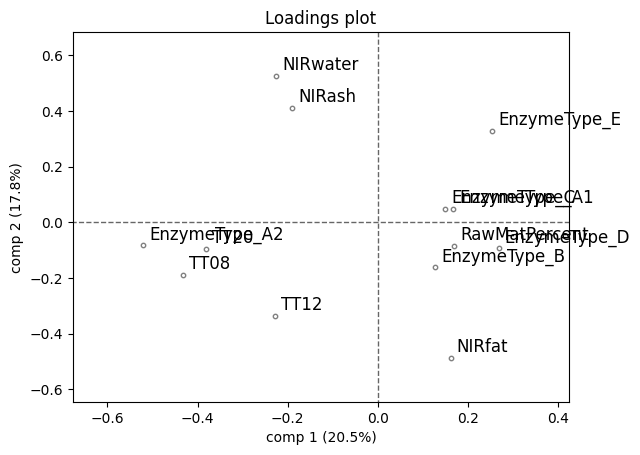

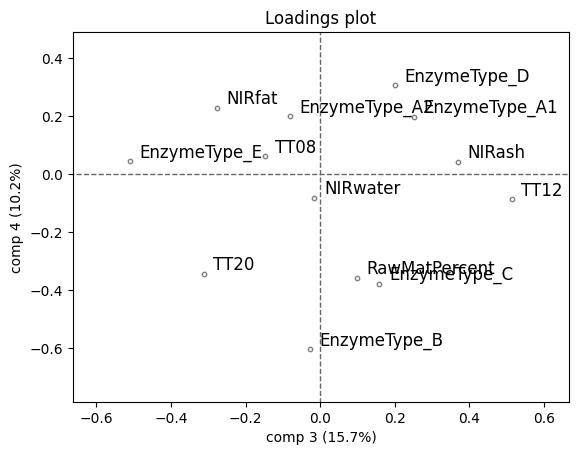

In [9]:
# pca plot kompoenent 1 and 2
hop.plot(pca_modell, comp = [1,2],
         plots = [2],
         XvarNames=variabel_navn)

# pca plt komponent 3 and 4
hop.plot(pca_modell, comp = [3,4],
         plots = [2],
         XvarNames=variabel_navn)

# Dataforståelse av behandlet datasett: Hele datasett

Informasjon om antall observasjoner for hver kolonne

In [10]:
behandlet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28976 entries, 2022-10-31 17:37:00 to 2023-06-14 01:02:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EnzymeType_A1   28976 non-null  int64  
 1   EnzymeType_A2   28976 non-null  int64  
 2   EnzymeType_B    28976 non-null  int64  
 3   EnzymeType_C    28976 non-null  int64  
 4   EnzymeType_D    28976 non-null  int64  
 5   EnzymeType_E    28976 non-null  int64  
 6   RawMatPercent   28976 non-null  float64
 7   NIRfat          28976 non-null  float64
 8   NIRash          28976 non-null  float64
 9   NIRwater        28976 non-null  float64
 10  TT08            28976 non-null  float64
 11  TT20            28976 non-null  float64
 12  TT12            28976 non-null  float64
 13  Collagen        85 non-null     float64
 14  Mw              455 non-null    float64
 15  SmallMolecules  455 non-null    float64
 16  BrixAdjusted    455 non-null    float64
d

## Fordeling i variabler i behandlet datasett

Lager kopi for merinformasjon om tid og enzymtype

In [11]:
# Legger til uke og dagsinformasjon
behandlet_data_tid = copy.deepcopy(behandlet_data)
behandlet_data_tid['Week'] = behandlet_data.index.isocalendar().week
behandlet_data_tid['Day'] = (behandlet_data_tid.index.isocalendar().day)

# Enzymtyper
enzym_data = rå_data.merge(behandlet_data_tid,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

# Legger til enzymtypeinformasjon og ekskluderer "labelancodet"-kolonner for
# enzymer
behandlet_data_tid = pd.concat([behandlet_data_tid, enzym_data], axis=1)
behandlet_data_tid = behandlet_data_tid.iloc[:, 6:]

## Fordeling i variablene for hele datasettet med uke- og dagsinformasjon

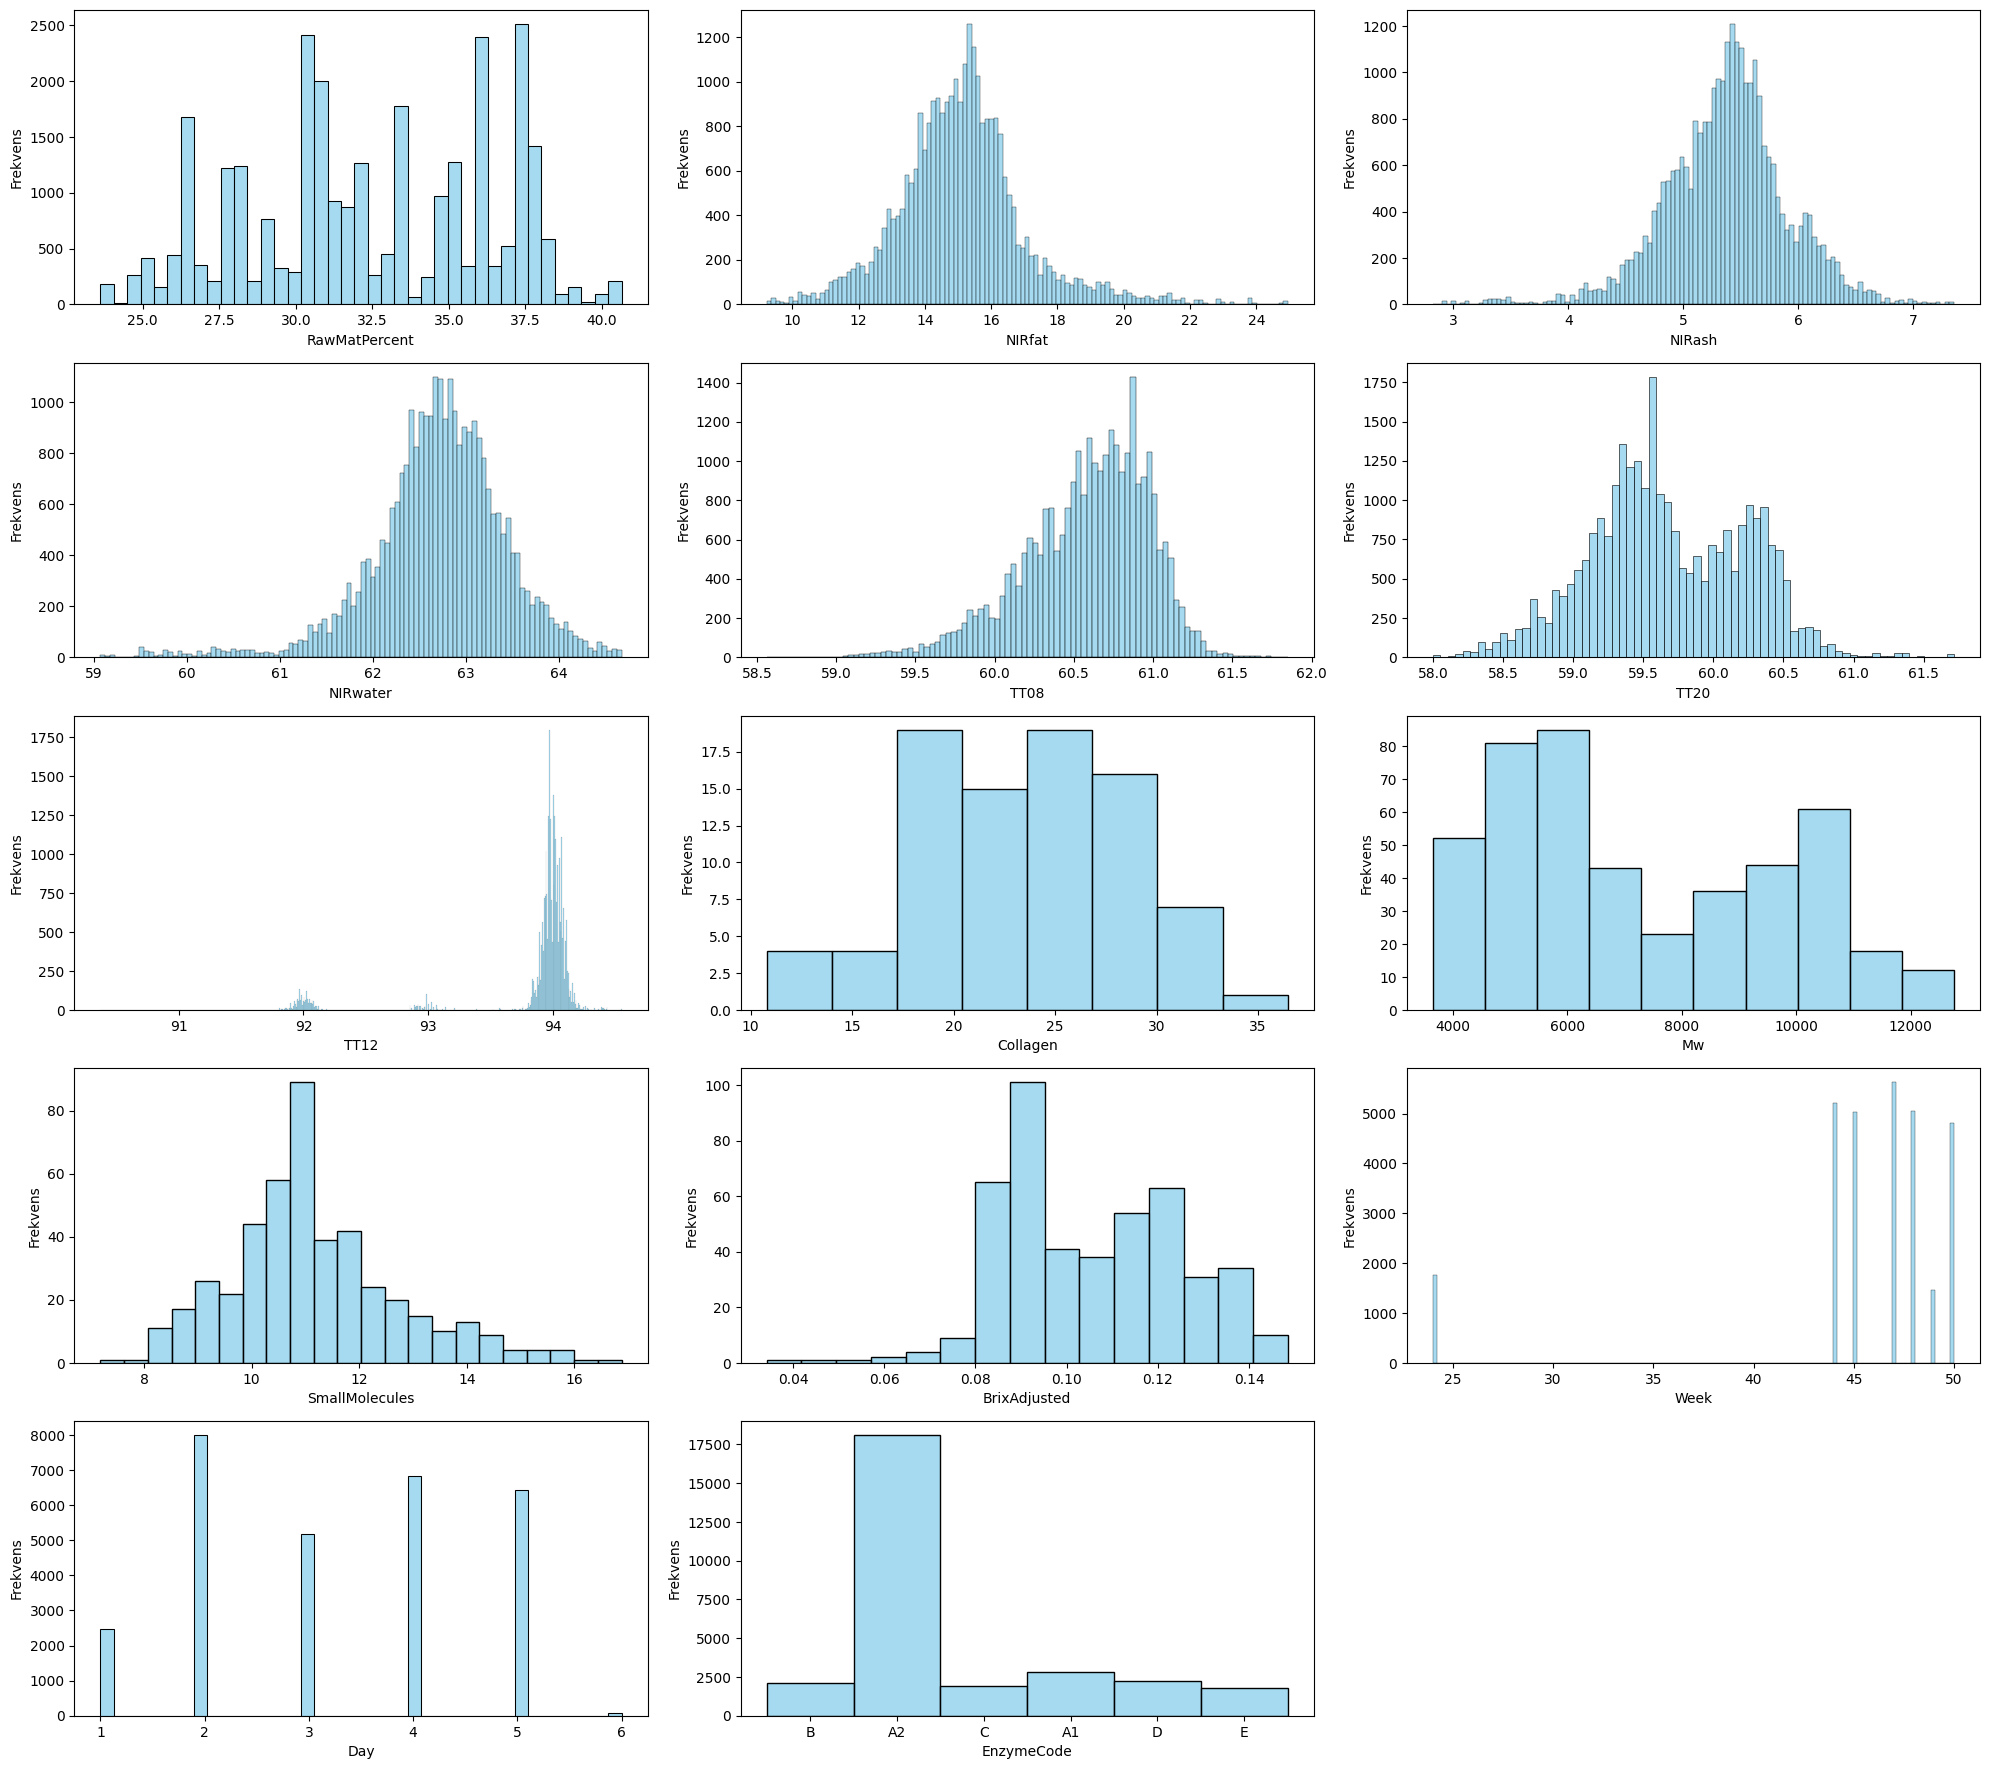

In [12]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(behandlet_data_tid.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data_tid):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=behandlet_data_tid, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i hele datasett

In [13]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 behandlet_data)
print(enzymtyper_data)

    Frekvens  Andel
A2     18090  62.43
A1      2845   9.82
D       2256   7.79
B       2113   7.29
C       1903   6.57
E       1769   6.11


## Fordeling i markert del av datasettet

In [14]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_tid.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_tid.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

Fordeling i datasett med Collagen som markert respons

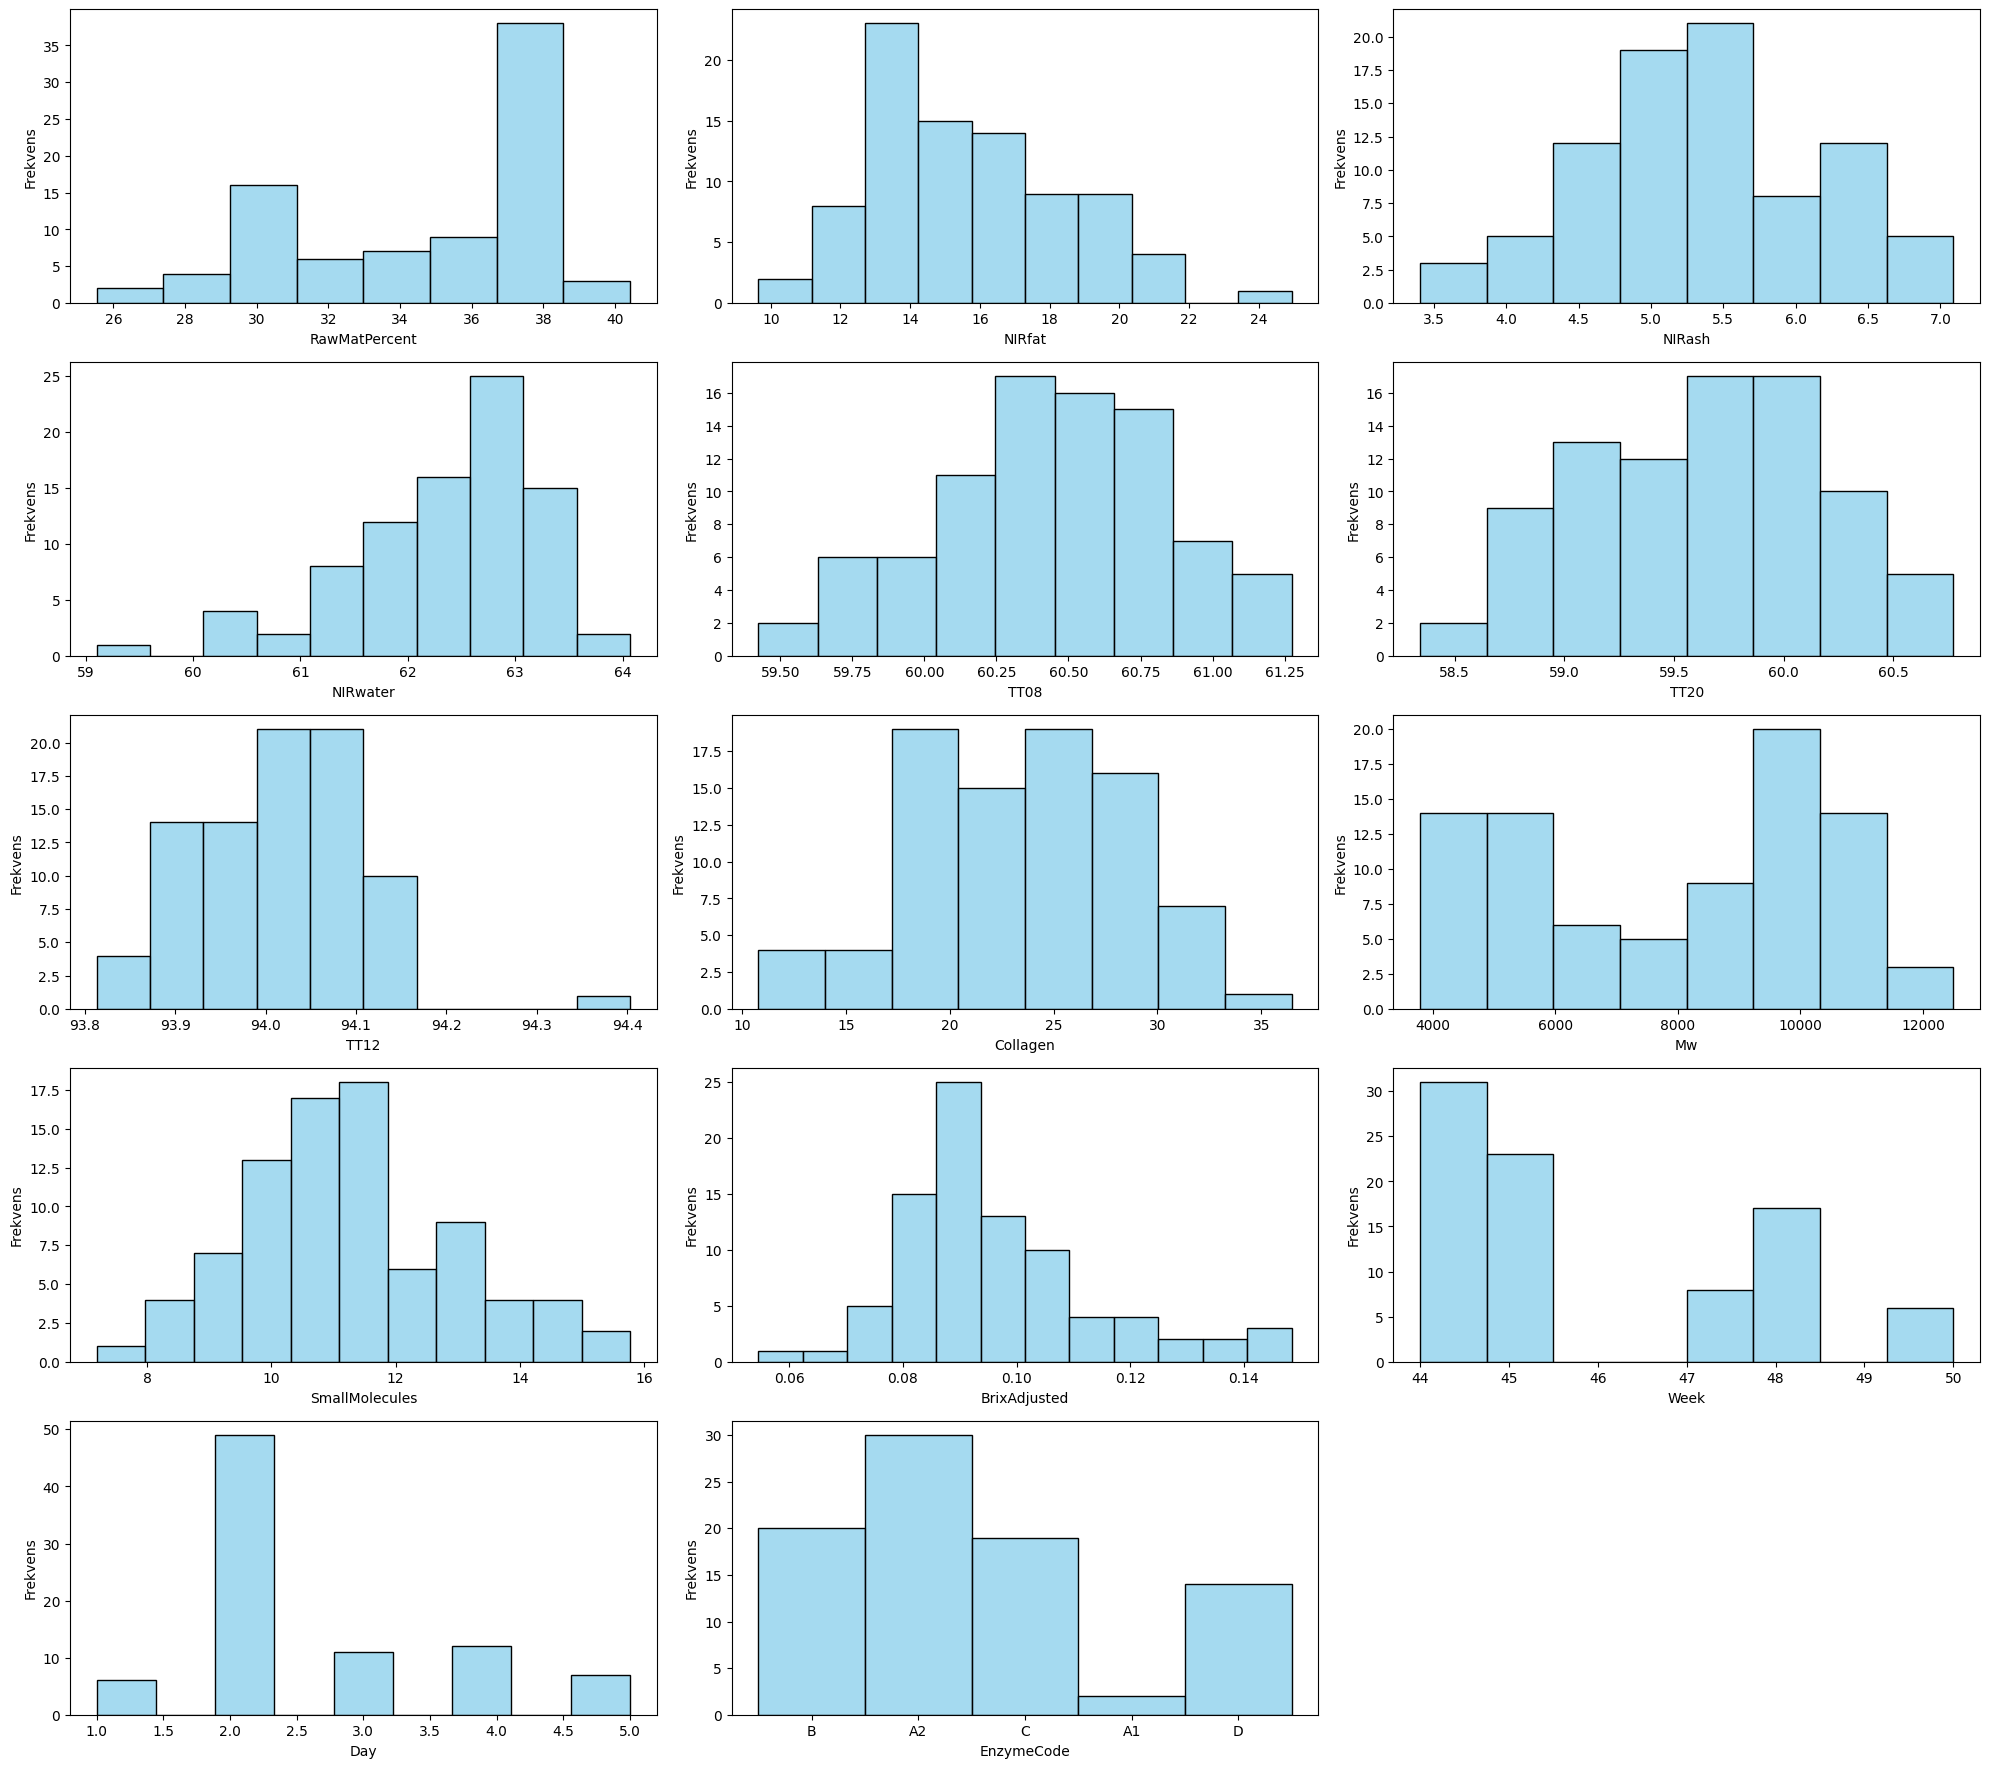

In [15]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(collagen_markert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_markert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=collagen_markert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med Collagen som respons

In [16]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 collagen_markert)
print(enzymtyper_data)

    Frekvens  Andel
A2        30  35.29
B         20  23.53
C         19  22.35
D         14  16.47
A1         2   2.35


Fordeling i datasett med resterende kvalitetsmålinger som markert respons

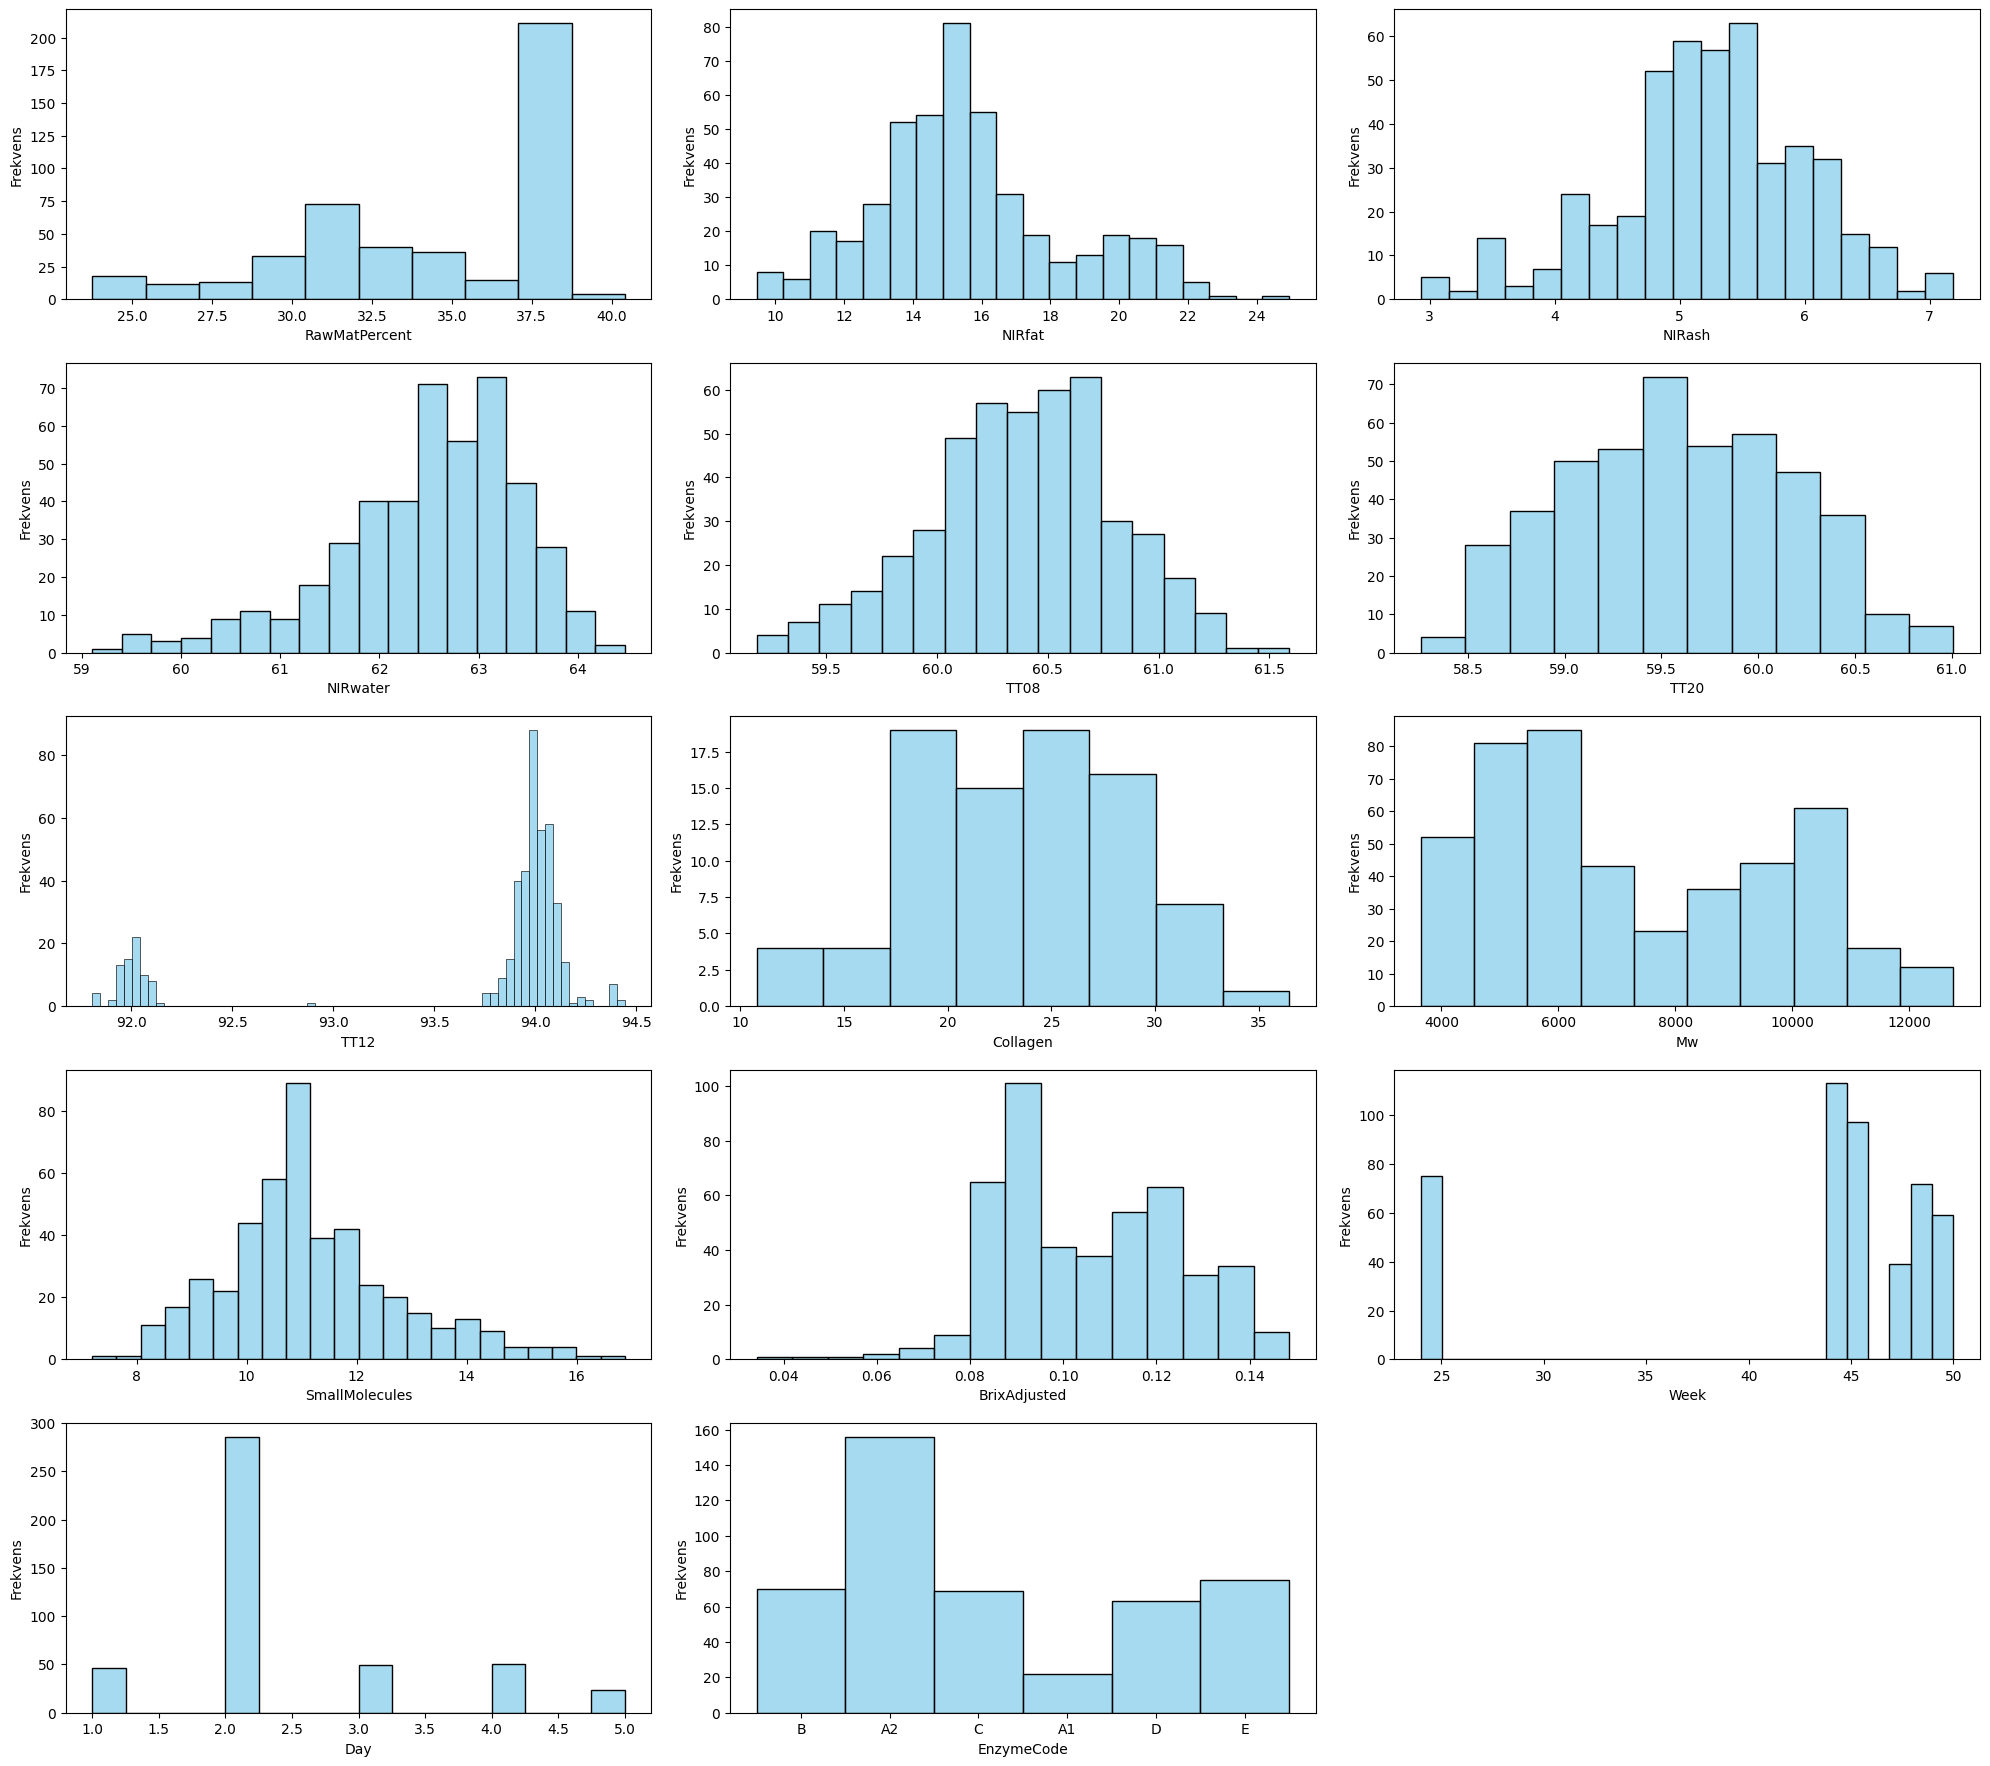

In [17]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(kvalitetsmålinger_markert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_markert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=kvalitetsmålinger_markert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som respons

In [18]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 kvalitetsmålinger_markert)
print(enzymtyper_data)

    Frekvens  Andel
A2       156  34.29
E         75  16.48
B         70  15.38
C         69  15.16
D         63  13.85
A1        22   4.84


Fordeling i umarkert del av datasettet

In [19]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = behandlet_data_tid[behandlet_data_tid['Collagen'].isna()]

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = behandlet_data_tid[behandlet_data_tid['Mw'].isna()]

Fordeling i datasett med Collagen som markert respons

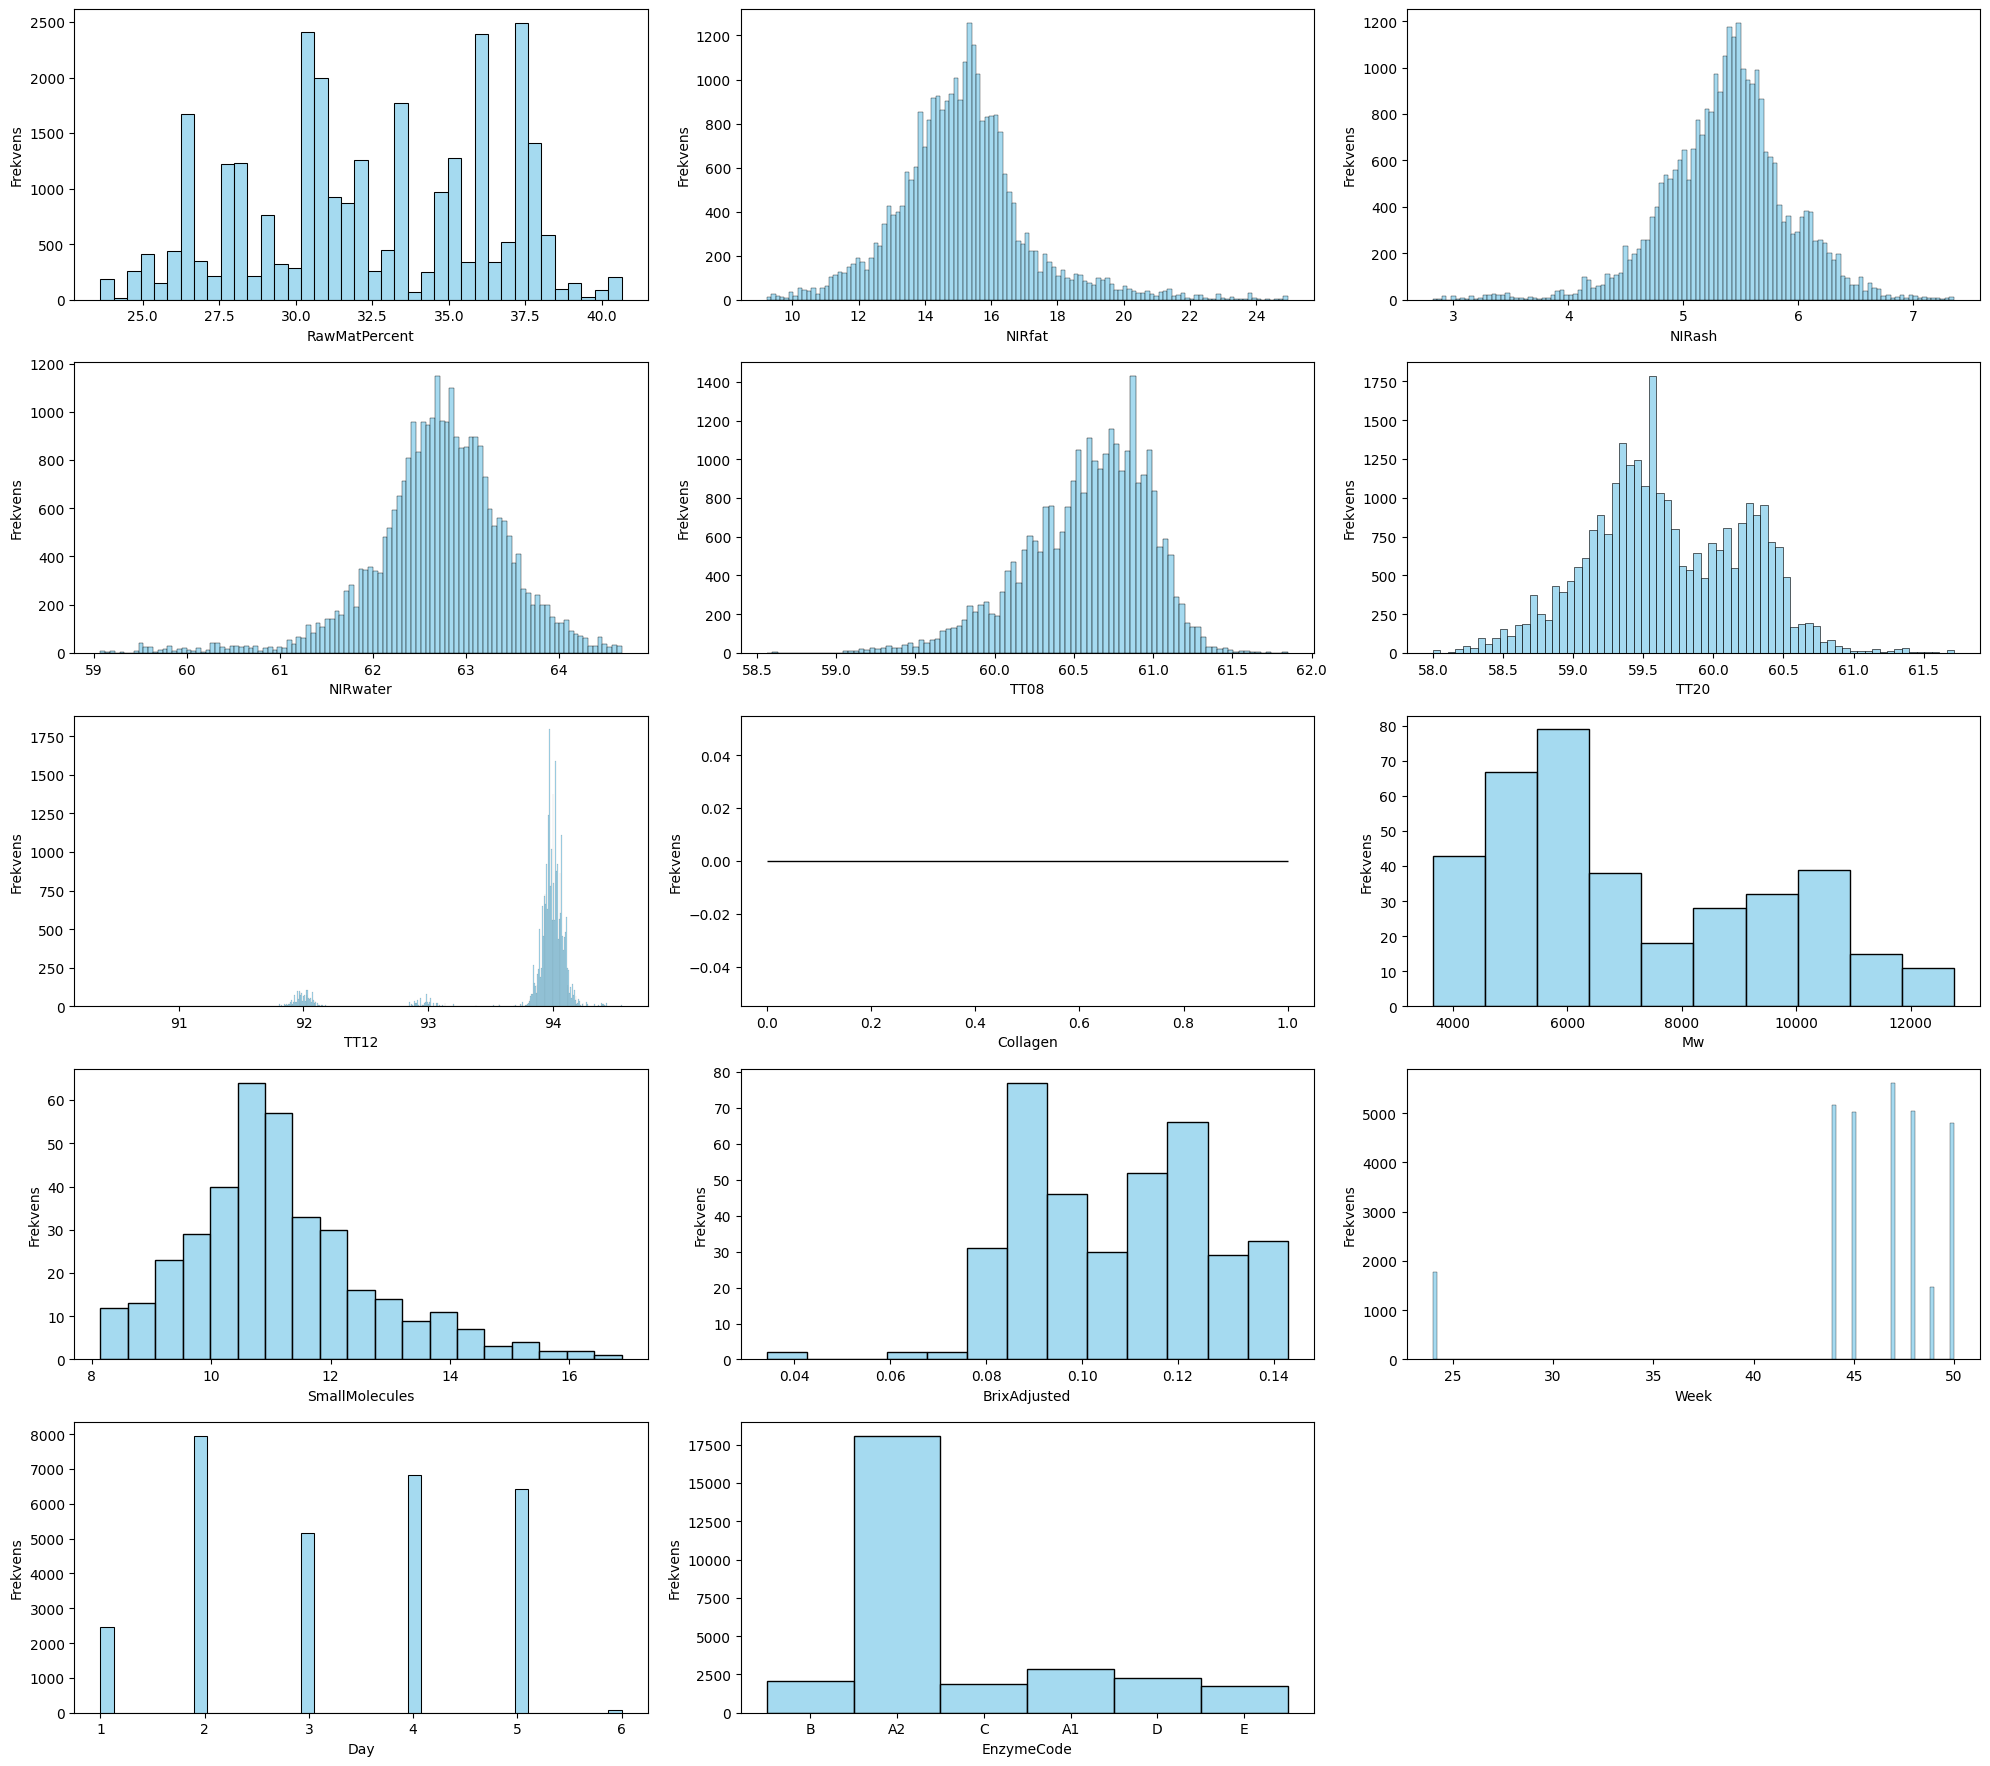

In [20]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(collagen_umarkert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_umarkert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=collagen_umarkert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med Collagen som umarkert respons

In [21]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 collagen_umarkert)
print(enzymtyper_data)

    Frekvens  Andel
A2     18060  62.51
A1      2843   9.84
D       2242   7.76
B       2093   7.24
C       1884   6.52
E       1769   6.12


Fordeling i datasett med resterende kvalitetsmålinger som markert respons

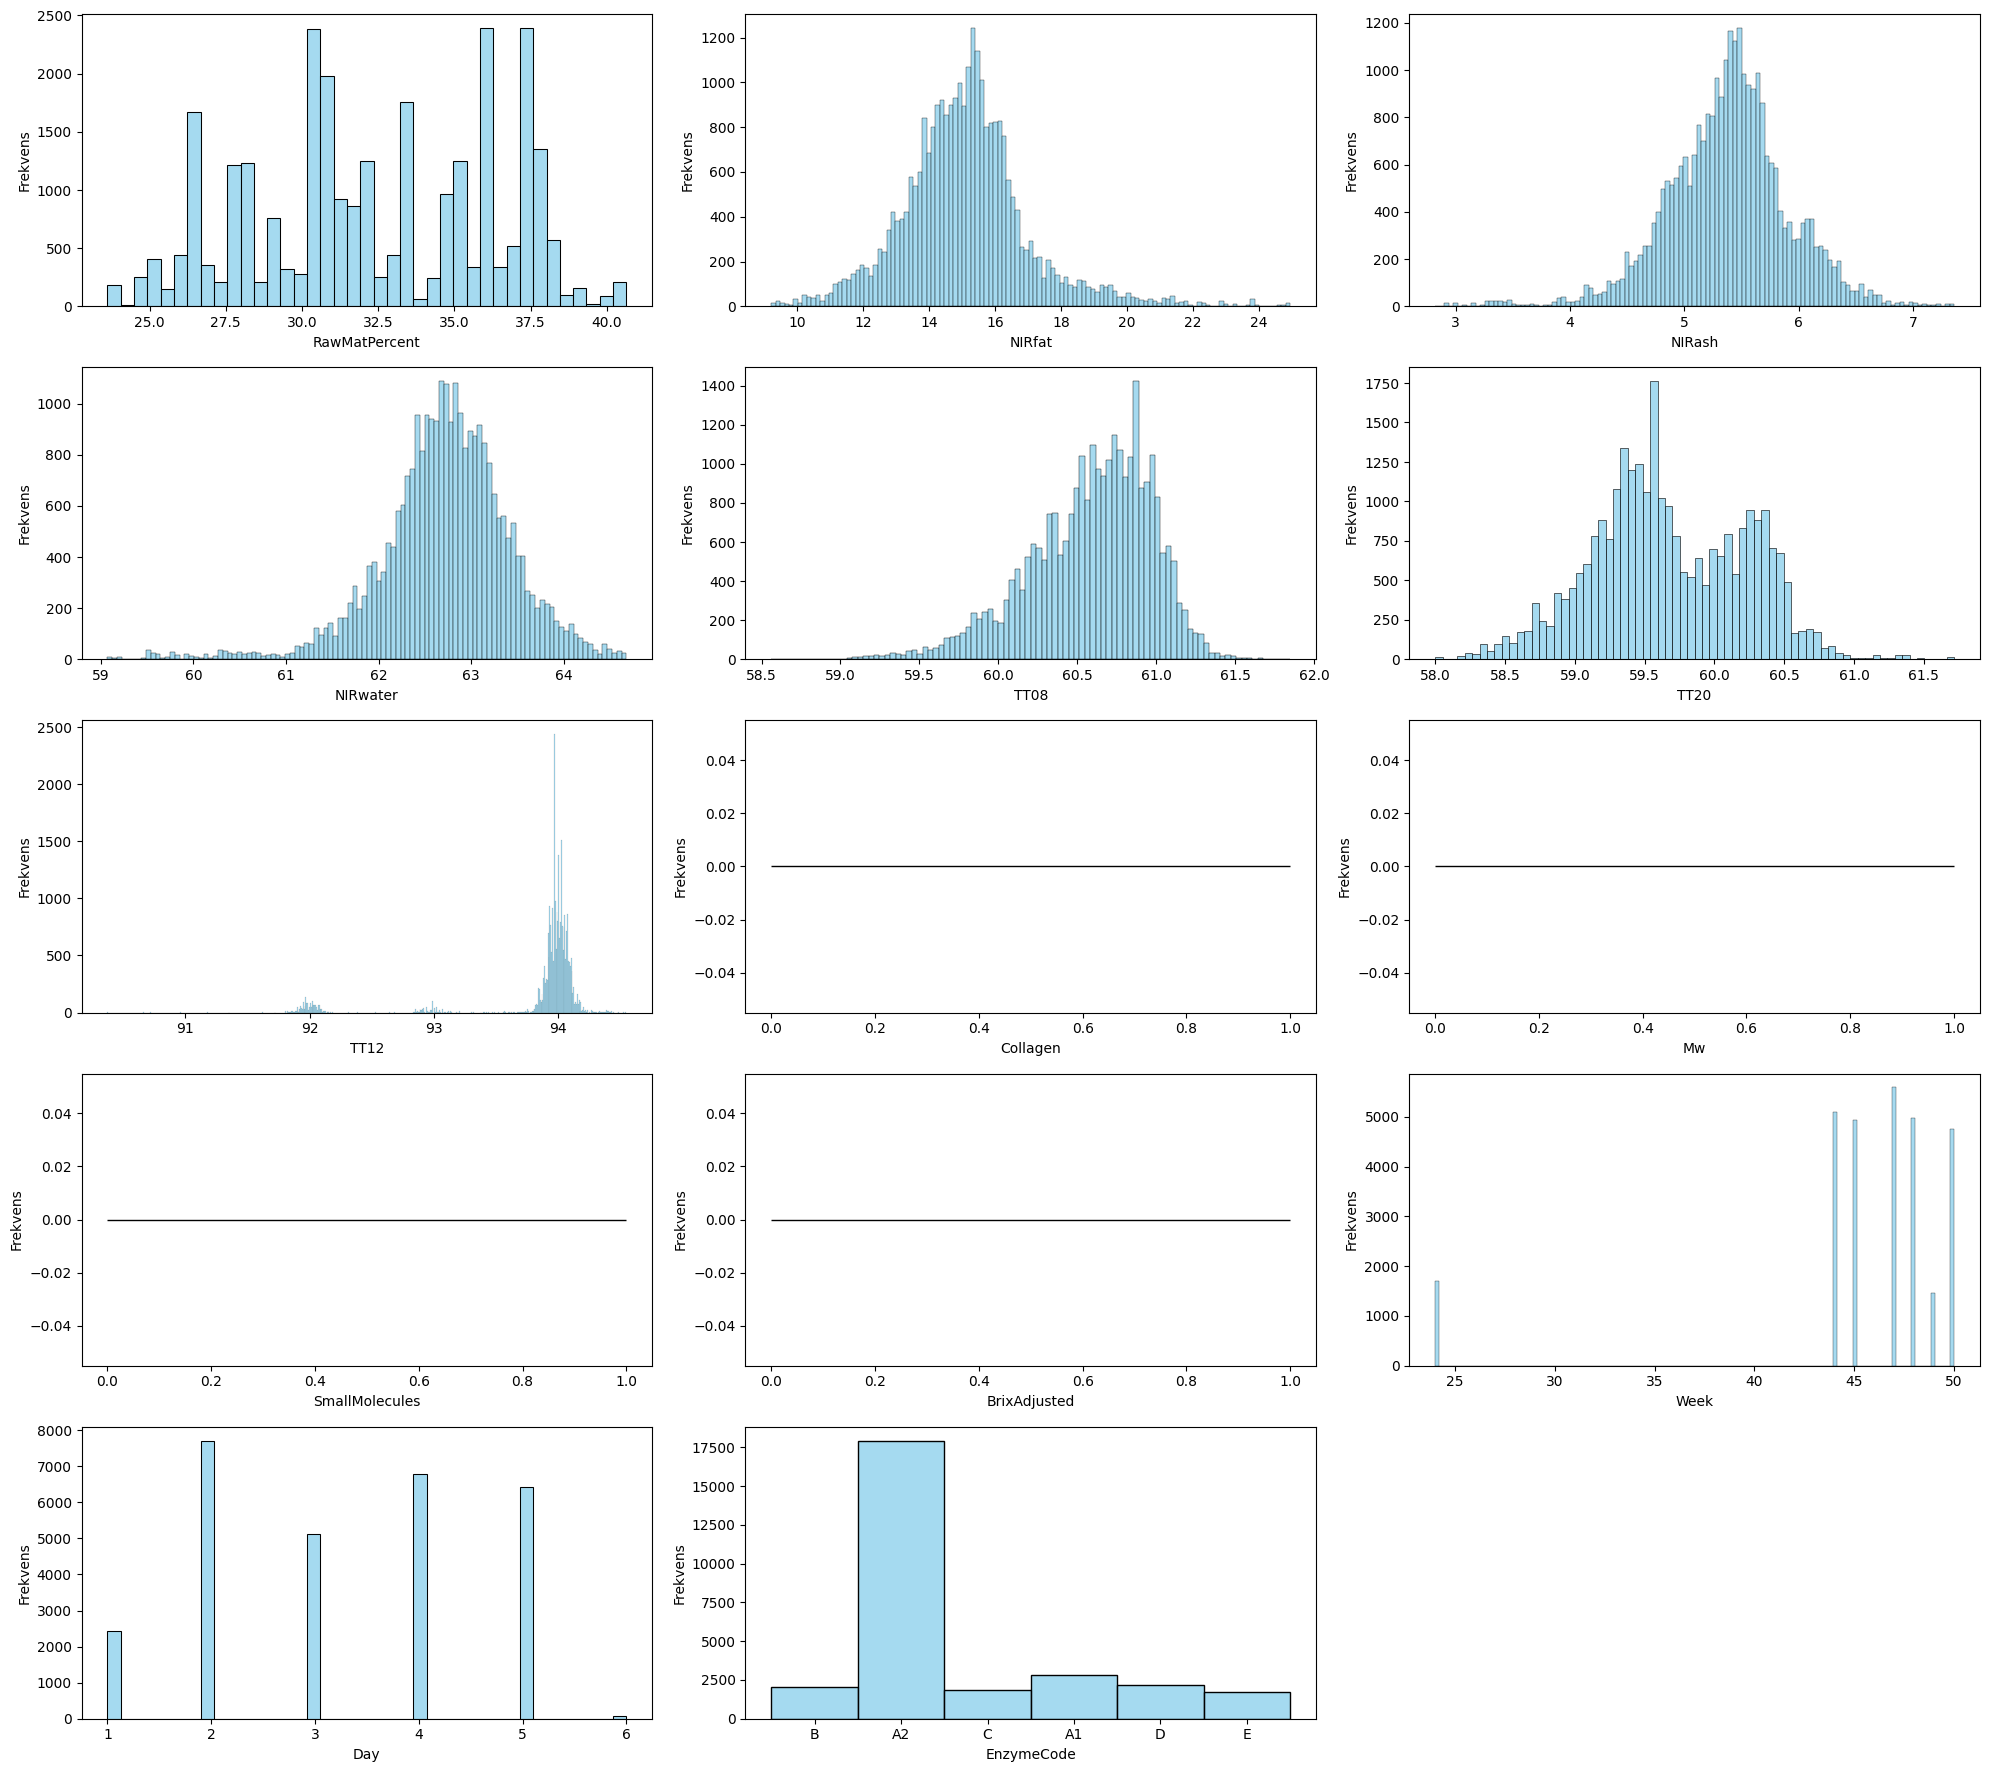

In [22]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(kvalitetsmålinger_umarkert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_umarkert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=kvalitetsmålinger_umarkert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som umarkert respons

In [23]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 kvalitetsmålinger_umarkert)
print(enzymtyper_data)

    Frekvens  Andel
A2     17934  62.88
A1      2823   9.90
D       2193   7.69
B       2043   7.16
C       1834   6.43
E       1694   5.94


## Korrelasjon

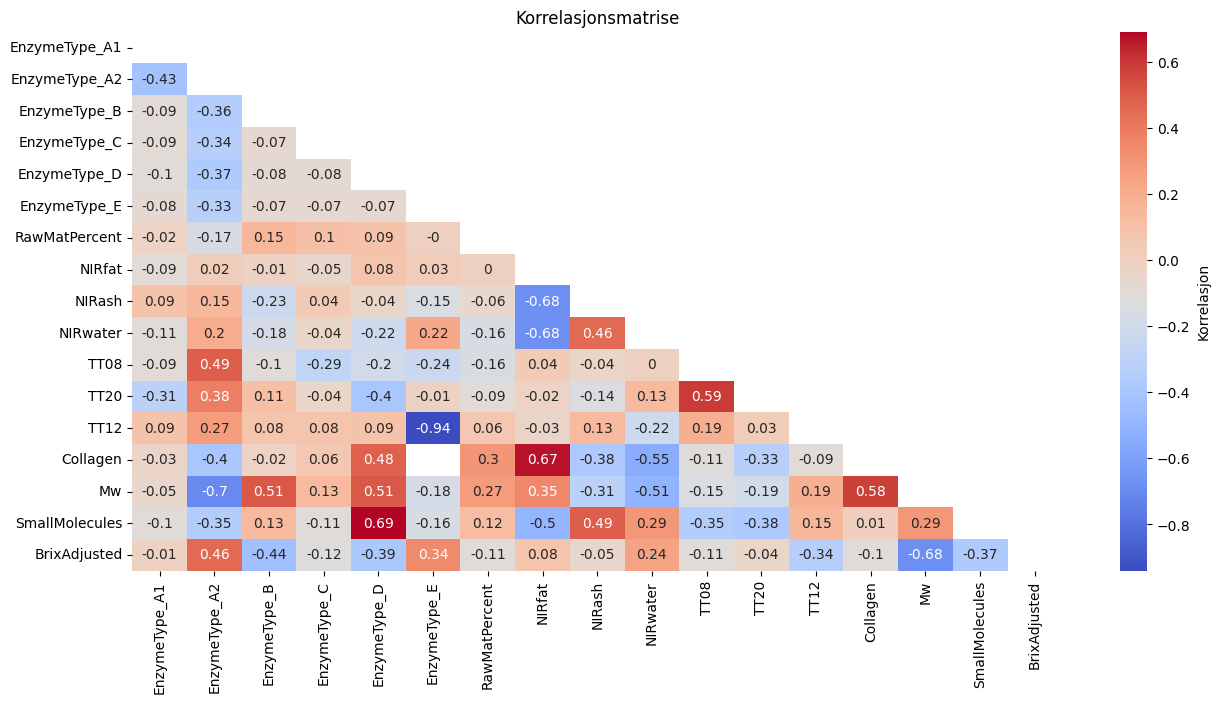

In [24]:
# Lager en korrelasjonsmatrise med annotering
korrelasjon_matrise = behandlet_data.corr()

# Runder av til 2 desimaler for bedre lesbarhet
korrelasjon_matrise_avrundet = korrelasjon_matrise.round(2)

# Triangulær matrise
maske = np.triu(np.ones_like(korrelasjon_matrise_avrundet,
                             dtype=bool))

plt.figure(figsize=(15, 7))
sns.heatmap(korrelasjon_matrise_avrundet,
            annot=True,
            mask=maske,
            cmap='coolwarm',
            cbar_kws={'label': 'Korrelasjon'})
plt.title("Korrelasjonsmatrise")
plt.show()

# Dataforståelse av behandlet datasett: Normal produksjon

Oppdeling av data for hver kvalitetsmåling under normal produksjon

In [25]:
behandlet_data_normalprod = copy.deepcopy(behandlet_data)
behandlet_data_normalprod['Day'] = (behandlet_data_normalprod.index.isocalendar().day)

# Ekskluderer de dager med "design"-produksjon
behandlet_data_normalprod = behandlet_data_normalprod[~behandlet_data_normalprod['Day'].isin([1,2])]

enzym_data = rå_data.merge(behandlet_data_normalprod,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

behandlet_data_normalprod_enzym = pd.concat([behandlet_data_normalprod, enzym_data], axis=1)
behandlet_data_normalprod_enzym = behandlet_data_normalprod_enzym.iloc[:, 6:]

In [26]:
behandlet_data_normalprod_enzym.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18510 entries, 2022-11-02 00:00:00 to 2023-06-14 01:02:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RawMatPercent   18510 non-null  float64
 1   NIRfat          18510 non-null  float64
 2   NIRash          18510 non-null  float64
 3   NIRwater        18510 non-null  float64
 4   TT08            18510 non-null  float64
 5   TT20            18510 non-null  float64
 6   TT12            18510 non-null  float64
 7   Collagen        30 non-null     float64
 8   Mw              123 non-null    float64
 9   SmallMolecules  123 non-null    float64
 10  BrixAdjusted    123 non-null    float64
 11  Day             18510 non-null  UInt32 
 12  EnzymeCode      18510 non-null  object 
dtypes: UInt32(1), float64(11), object(1)
memory usage: 2.4+ MB


Fordeling i variablene datasett med normal produksjon

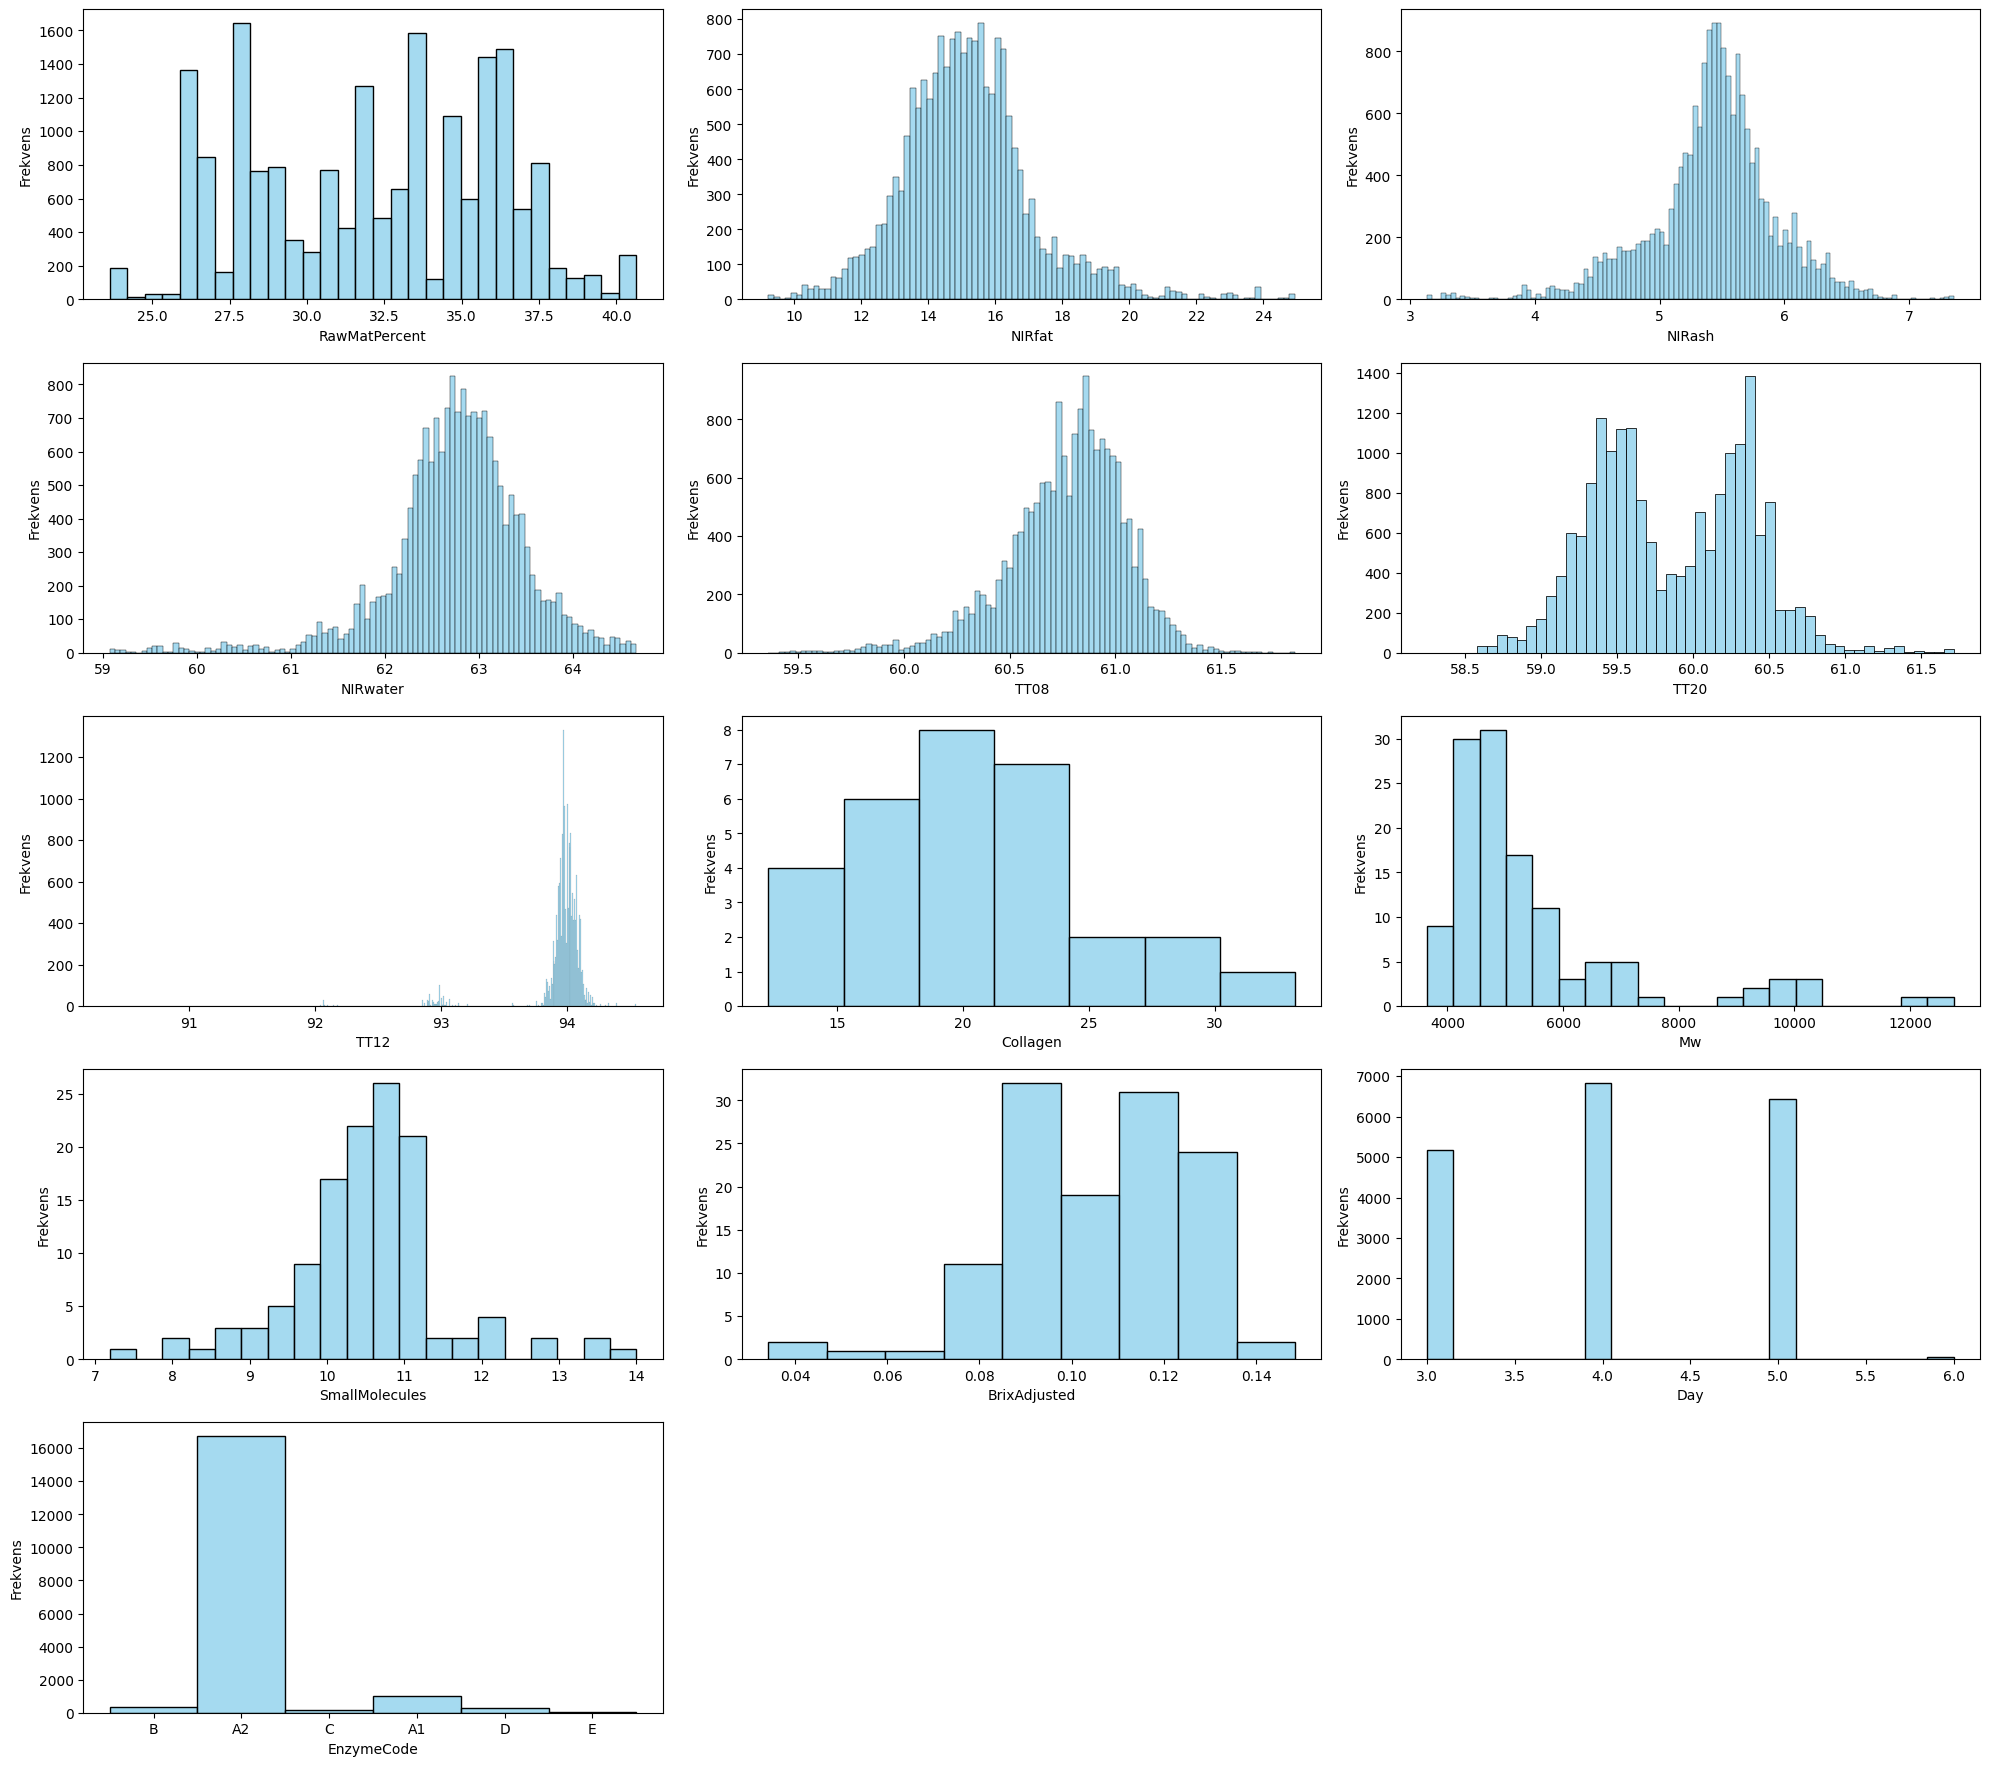

In [27]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(behandlet_data_normalprod_enzym.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data_normalprod_enzym):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=behandlet_data_normalprod_enzym, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i normal produksjon datasett

In [28]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 behandlet_data_normalprod_enzym)
print(enzymtyper_data)

    Frekvens  Andel
A2     16718  90.32
A1      1001   5.41
B        320   1.73
D        270   1.46
C        138   0.75
E         63   0.34


Fordeling i markert del av datasettet

In [29]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_normalprod_enzym.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_normalprod_enzym.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

Fordeling i datasett med Collagen som markert respons

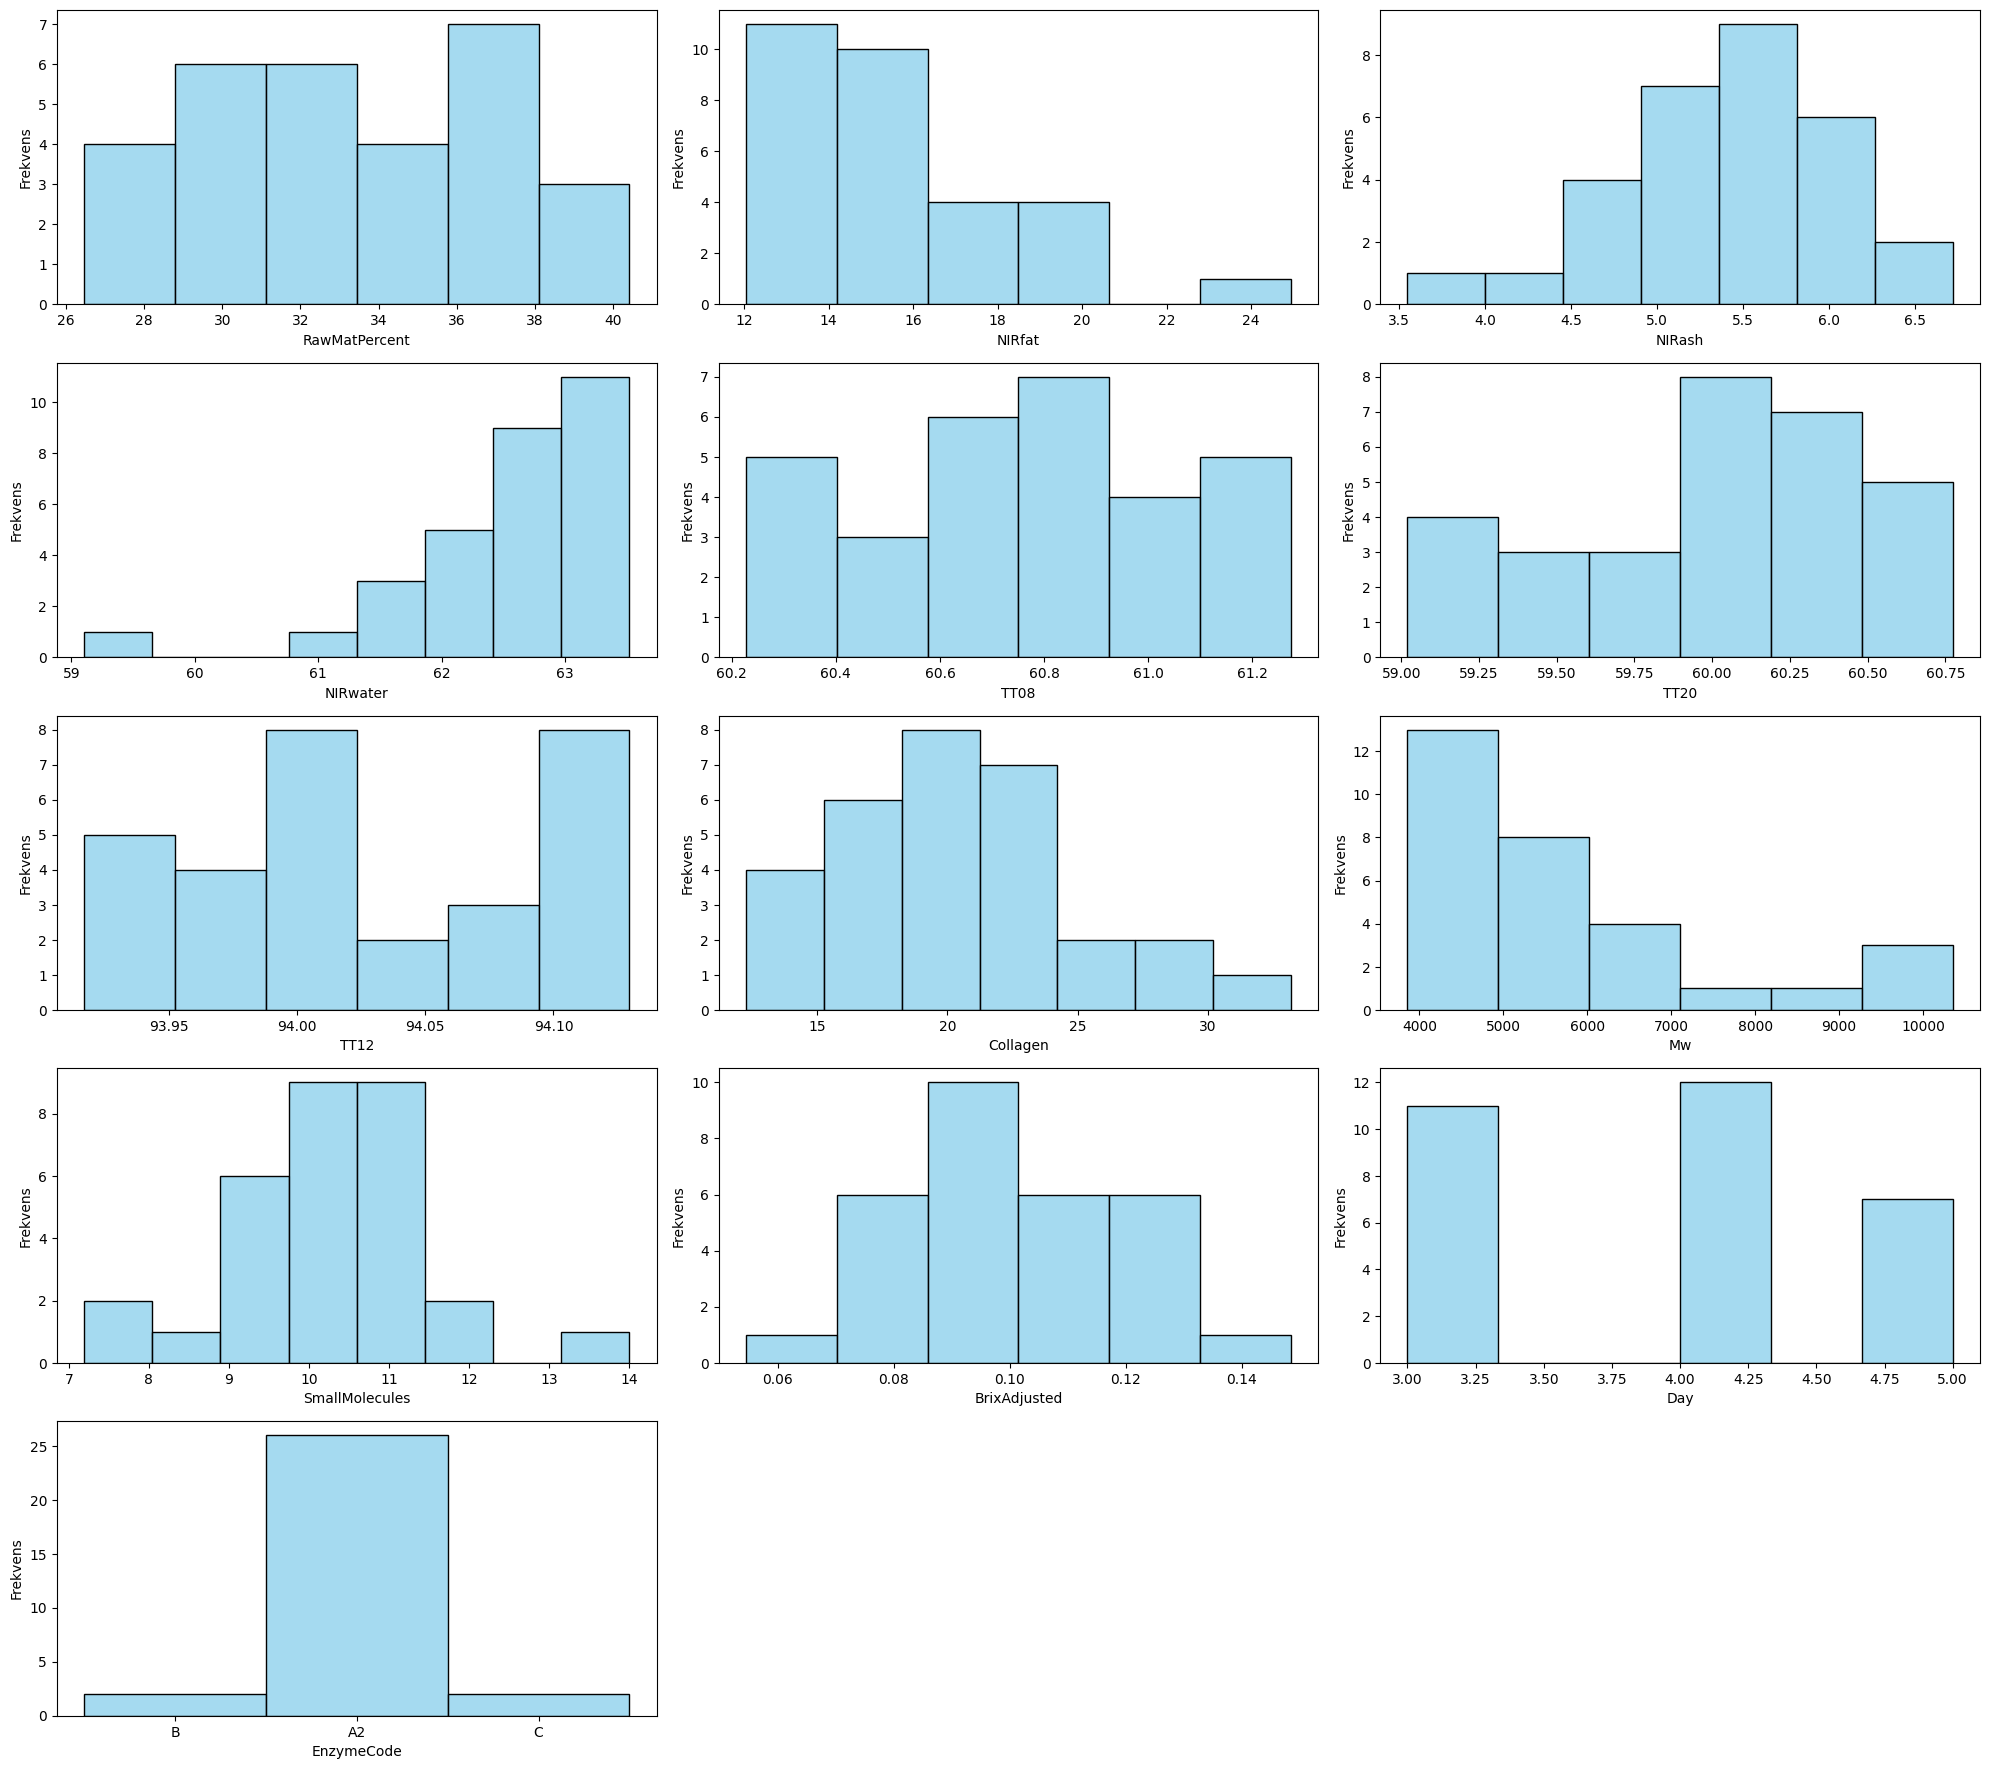

In [30]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(collagen_markert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_markert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=collagen_markert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med Collagen som respons

In [31]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 collagen_markert)
print(enzymtyper_data)

    Frekvens  Andel
A2        26  86.67
B          2   6.67
C          2   6.67


Fordeling i datasett med resterende kvalitetsmålinger som markert respons

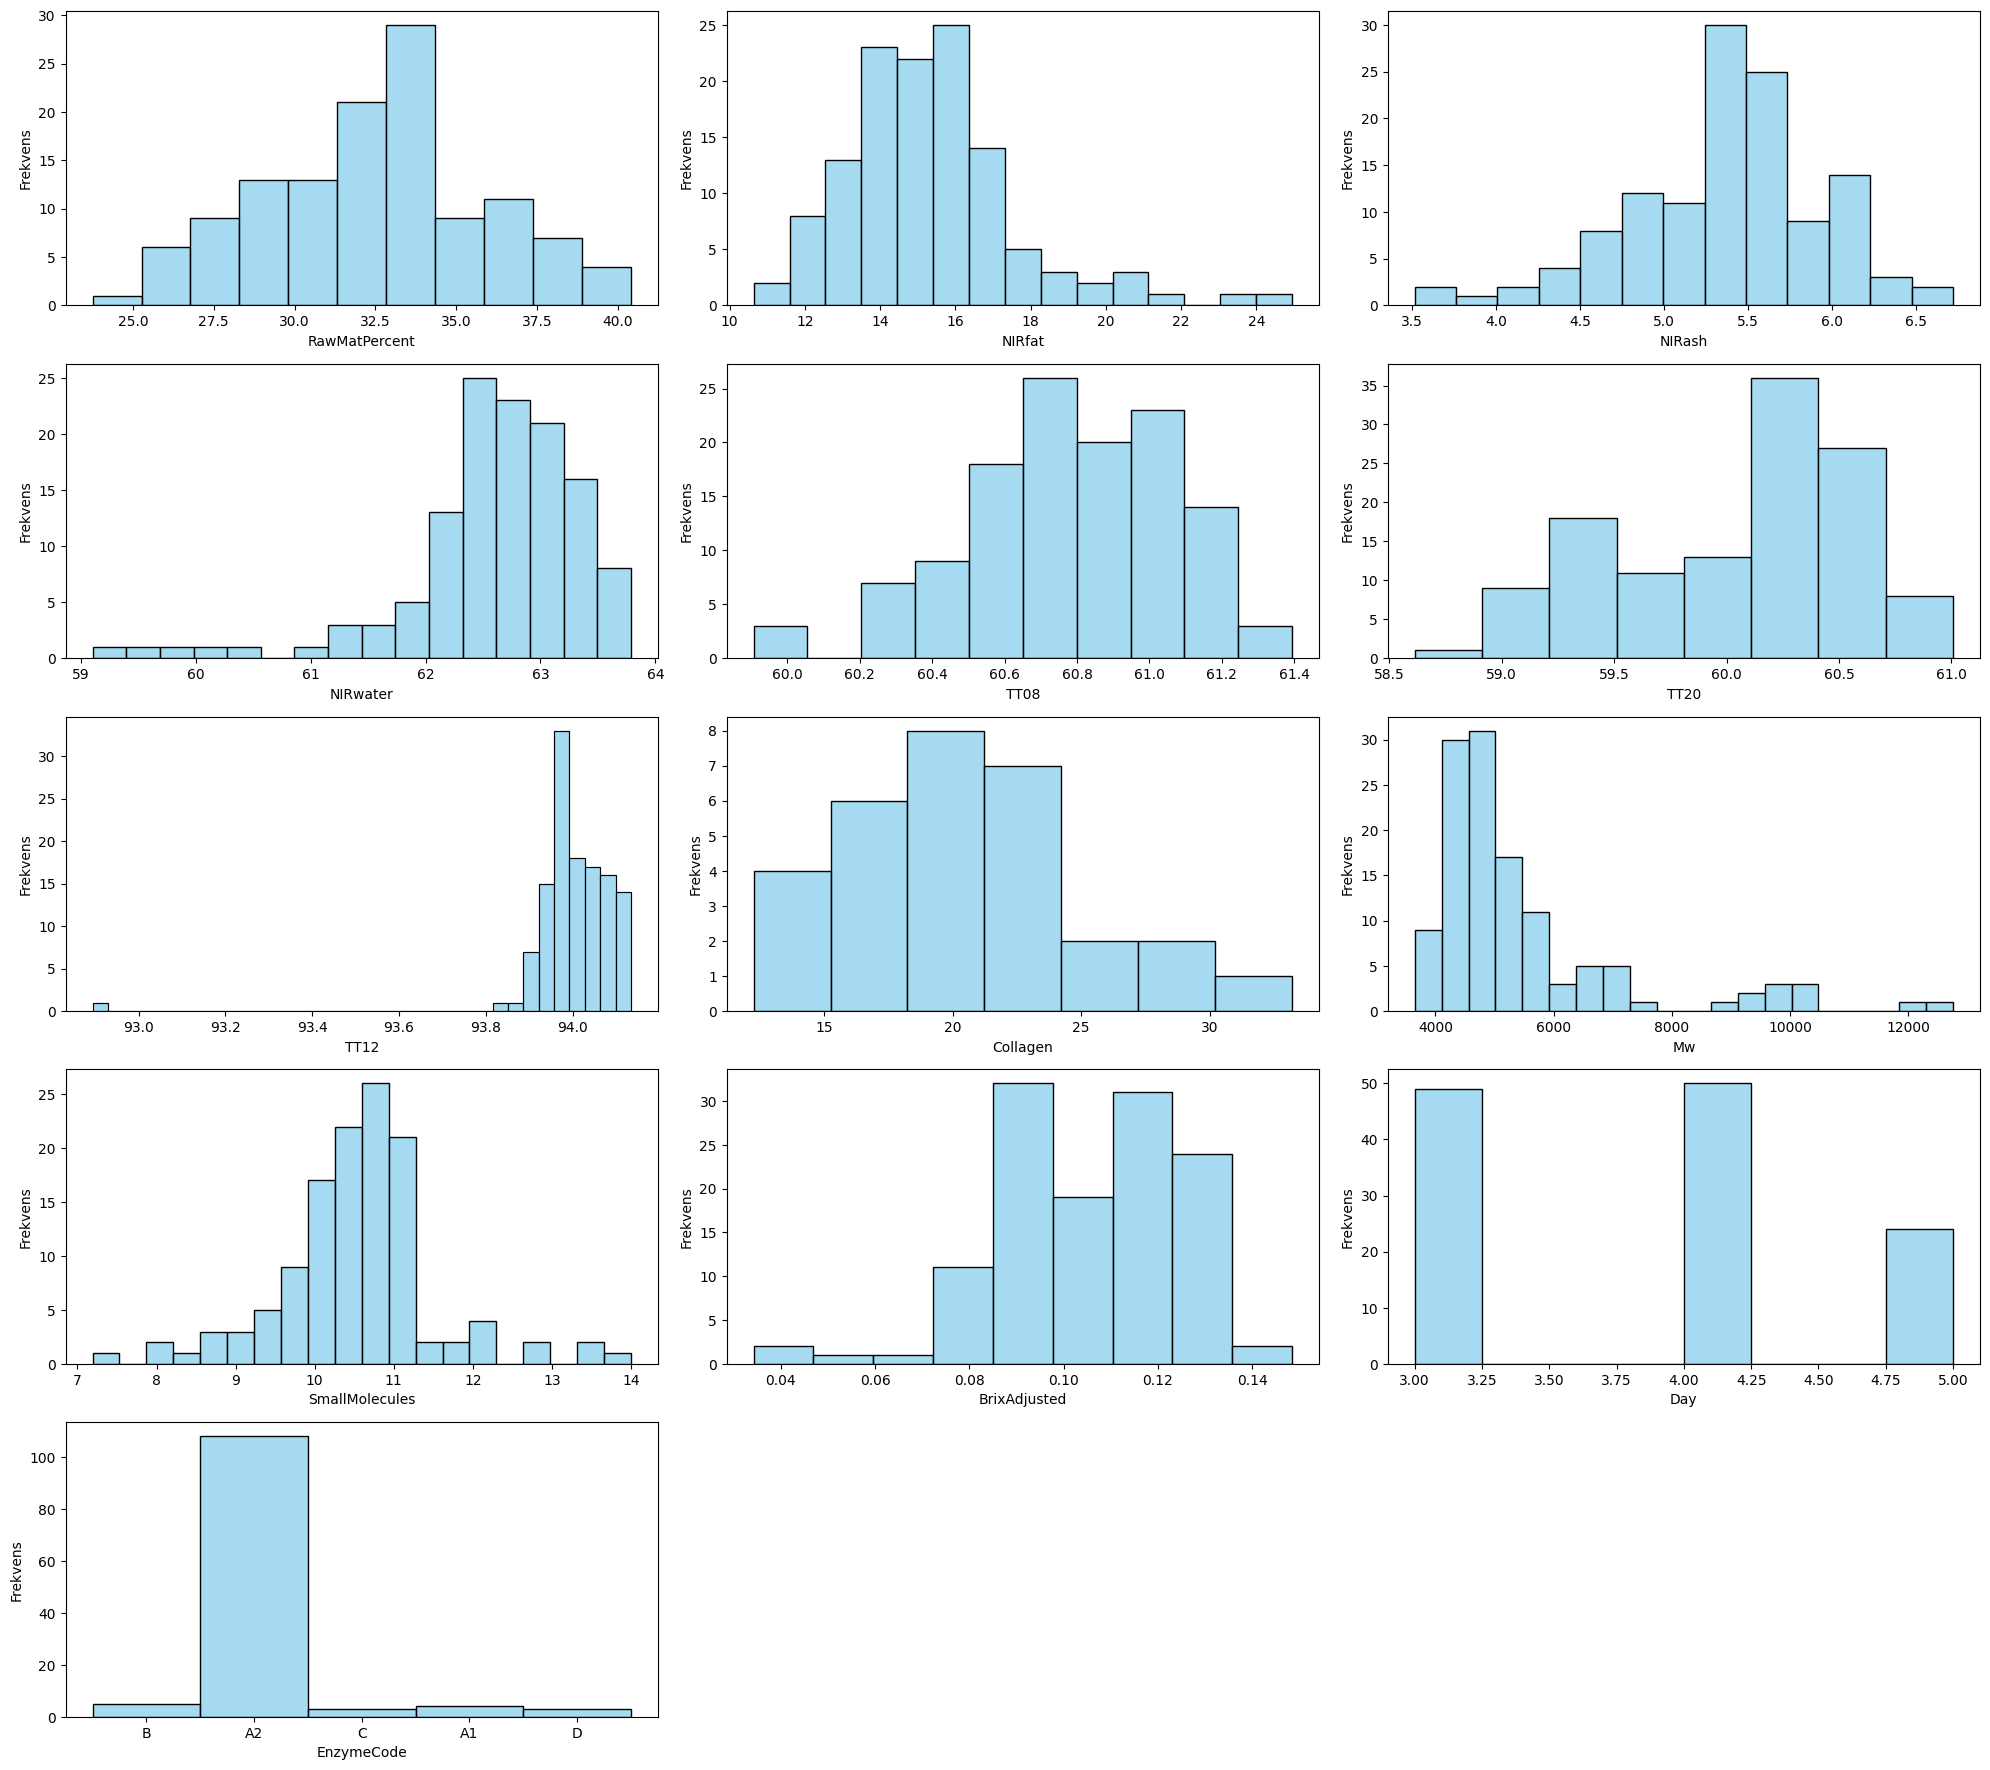

In [32]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(kvalitetsmålinger_markert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_markert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=kvalitetsmålinger_markert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som respons

In [33]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 kvalitetsmålinger_markert)
print(enzymtyper_data)

    Frekvens  Andel
A2       108  87.80
B          5   4.07
A1         4   3.25
C          3   2.44
D          3   2.44


Fordeling i umarkert del av datasettet

In [34]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = behandlet_data_normalprod_enzym[behandlet_data_normalprod_enzym['Collagen'].isna()]


# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = behandlet_data_normalprod_enzym[behandlet_data_normalprod_enzym['Mw'].isna()]

Fordeling i datasett med Collagen som umarkert respons

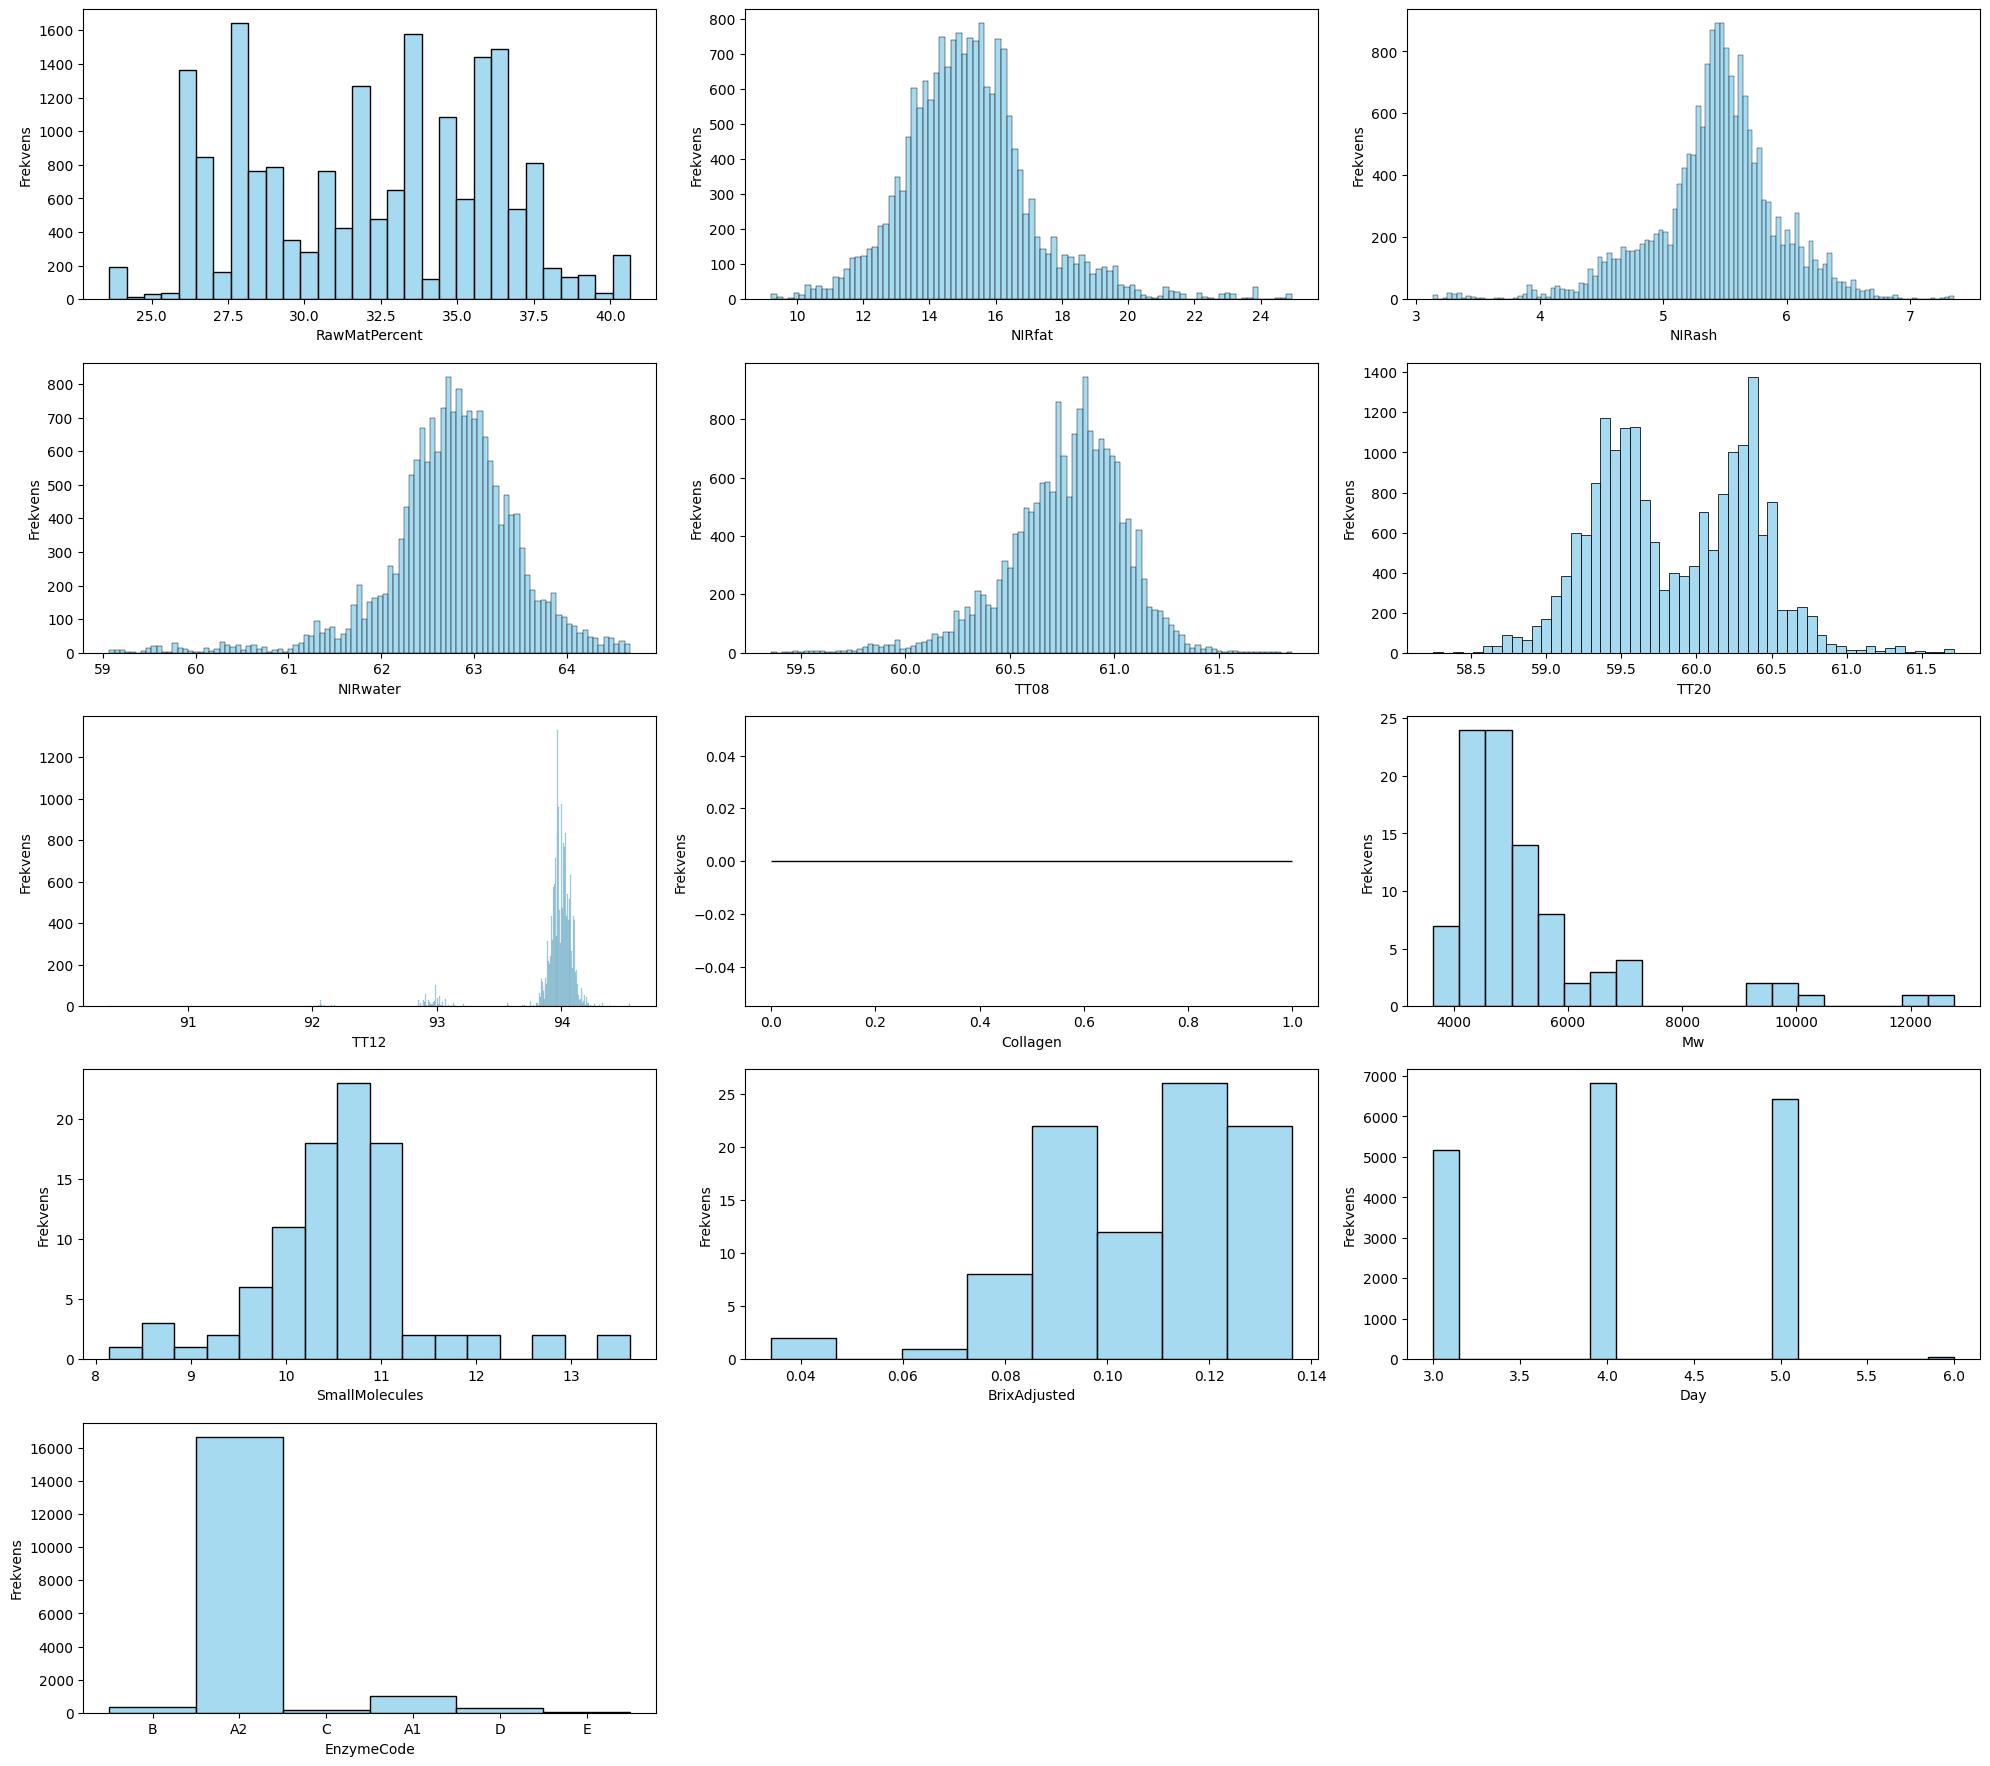

In [35]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(collagen_umarkert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_umarkert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=collagen_umarkert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med Collagen som umarkert respons

In [36]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 collagen_umarkert)
print(enzymtyper_data)

    Frekvens  Andel
A2     16692  90.32
A1      1001   5.42
B        318   1.72
D        270   1.46
C        136   0.74
E         63   0.34


Fordeling i datasett med resterende kvalitetsmålinger som umarkert respons

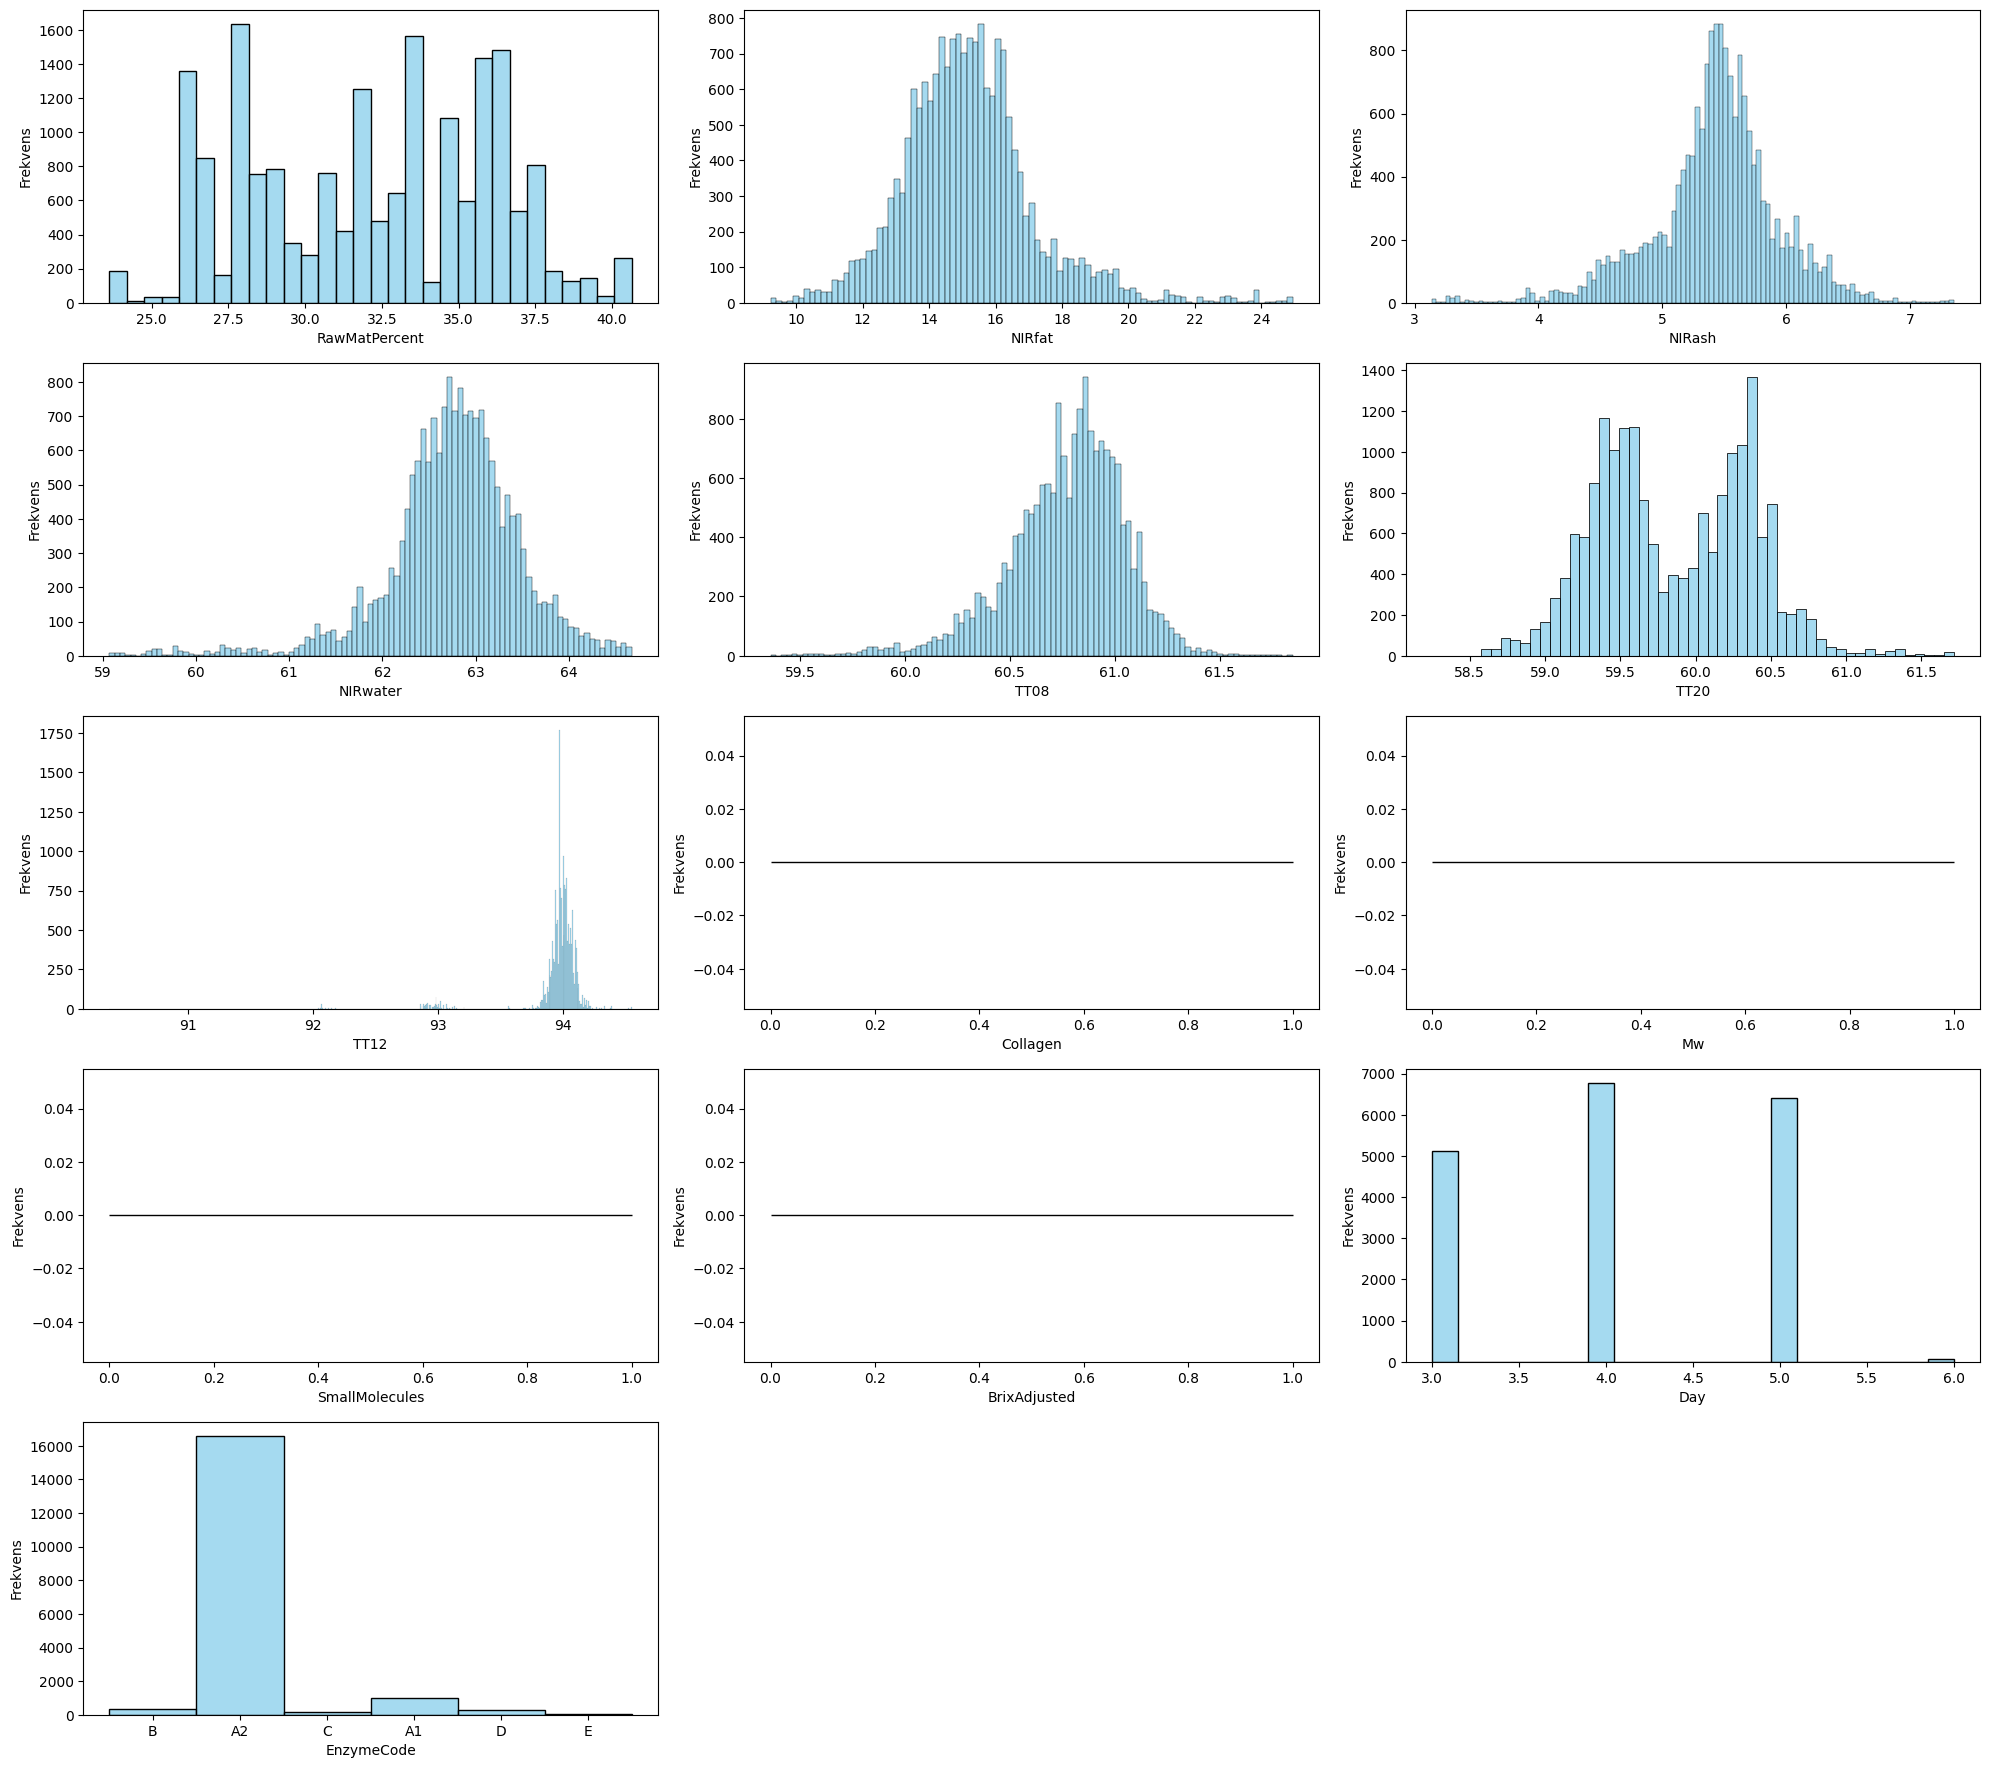

In [37]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(kvalitetsmålinger_umarkert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_umarkert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=kvalitetsmålinger_umarkert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som umarkert respons

In [38]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 kvalitetsmålinger_umarkert)
print(enzymtyper_data)

    Frekvens  Andel
A2     16610  90.34
A1       997   5.42
B        315   1.71
D        267   1.45
C        135   0.73
E         63   0.34


# Dataforståelse av behandlet datasett: Design produksjon

Oppdeling av data for hver kvalitetsmåling under design produksjon

In [39]:
behandlet_data_designprod = copy.deepcopy(behandlet_data)
behandlet_data_designprod['Day'] = (behandlet_data_designprod.index.isocalendar().day)

# Ekskluderer de dager med "normal"-produksjon
behandlet_data_designprod = behandlet_data_designprod[~behandlet_data_designprod['Day'].isin([3,4,5,6])]

enzym_data = rå_data.merge(behandlet_data_designprod,
                           left_index=True,
                           right_index=True,
                           how='inner',
                           suffixes=('','_drop'))['EnzymeCode']

behandlet_data_designprod_enzym = pd.concat([behandlet_data_designprod, enzym_data], axis=1)
behandlet_data_designprod_enzym = behandlet_data_designprod_enzym.iloc[:, 6:]

In [40]:
behandlet_data_designprod_enzym.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10466 entries, 2022-10-31 17:37:00 to 2023-06-13 23:59:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RawMatPercent   10466 non-null  float64
 1   NIRfat          10466 non-null  float64
 2   NIRash          10466 non-null  float64
 3   NIRwater        10466 non-null  float64
 4   TT08            10466 non-null  float64
 5   TT20            10466 non-null  float64
 6   TT12            10466 non-null  float64
 7   Collagen        55 non-null     float64
 8   Mw              332 non-null    float64
 9   SmallMolecules  332 non-null    float64
 10  BrixAdjusted    332 non-null    float64
 11  Day             10466 non-null  UInt32 
 12  EnzymeCode      10466 non-null  object 
dtypes: UInt32(1), float64(11), object(1)
memory usage: 1.3+ MB


Fordeling i variablene datasett med design produksjon

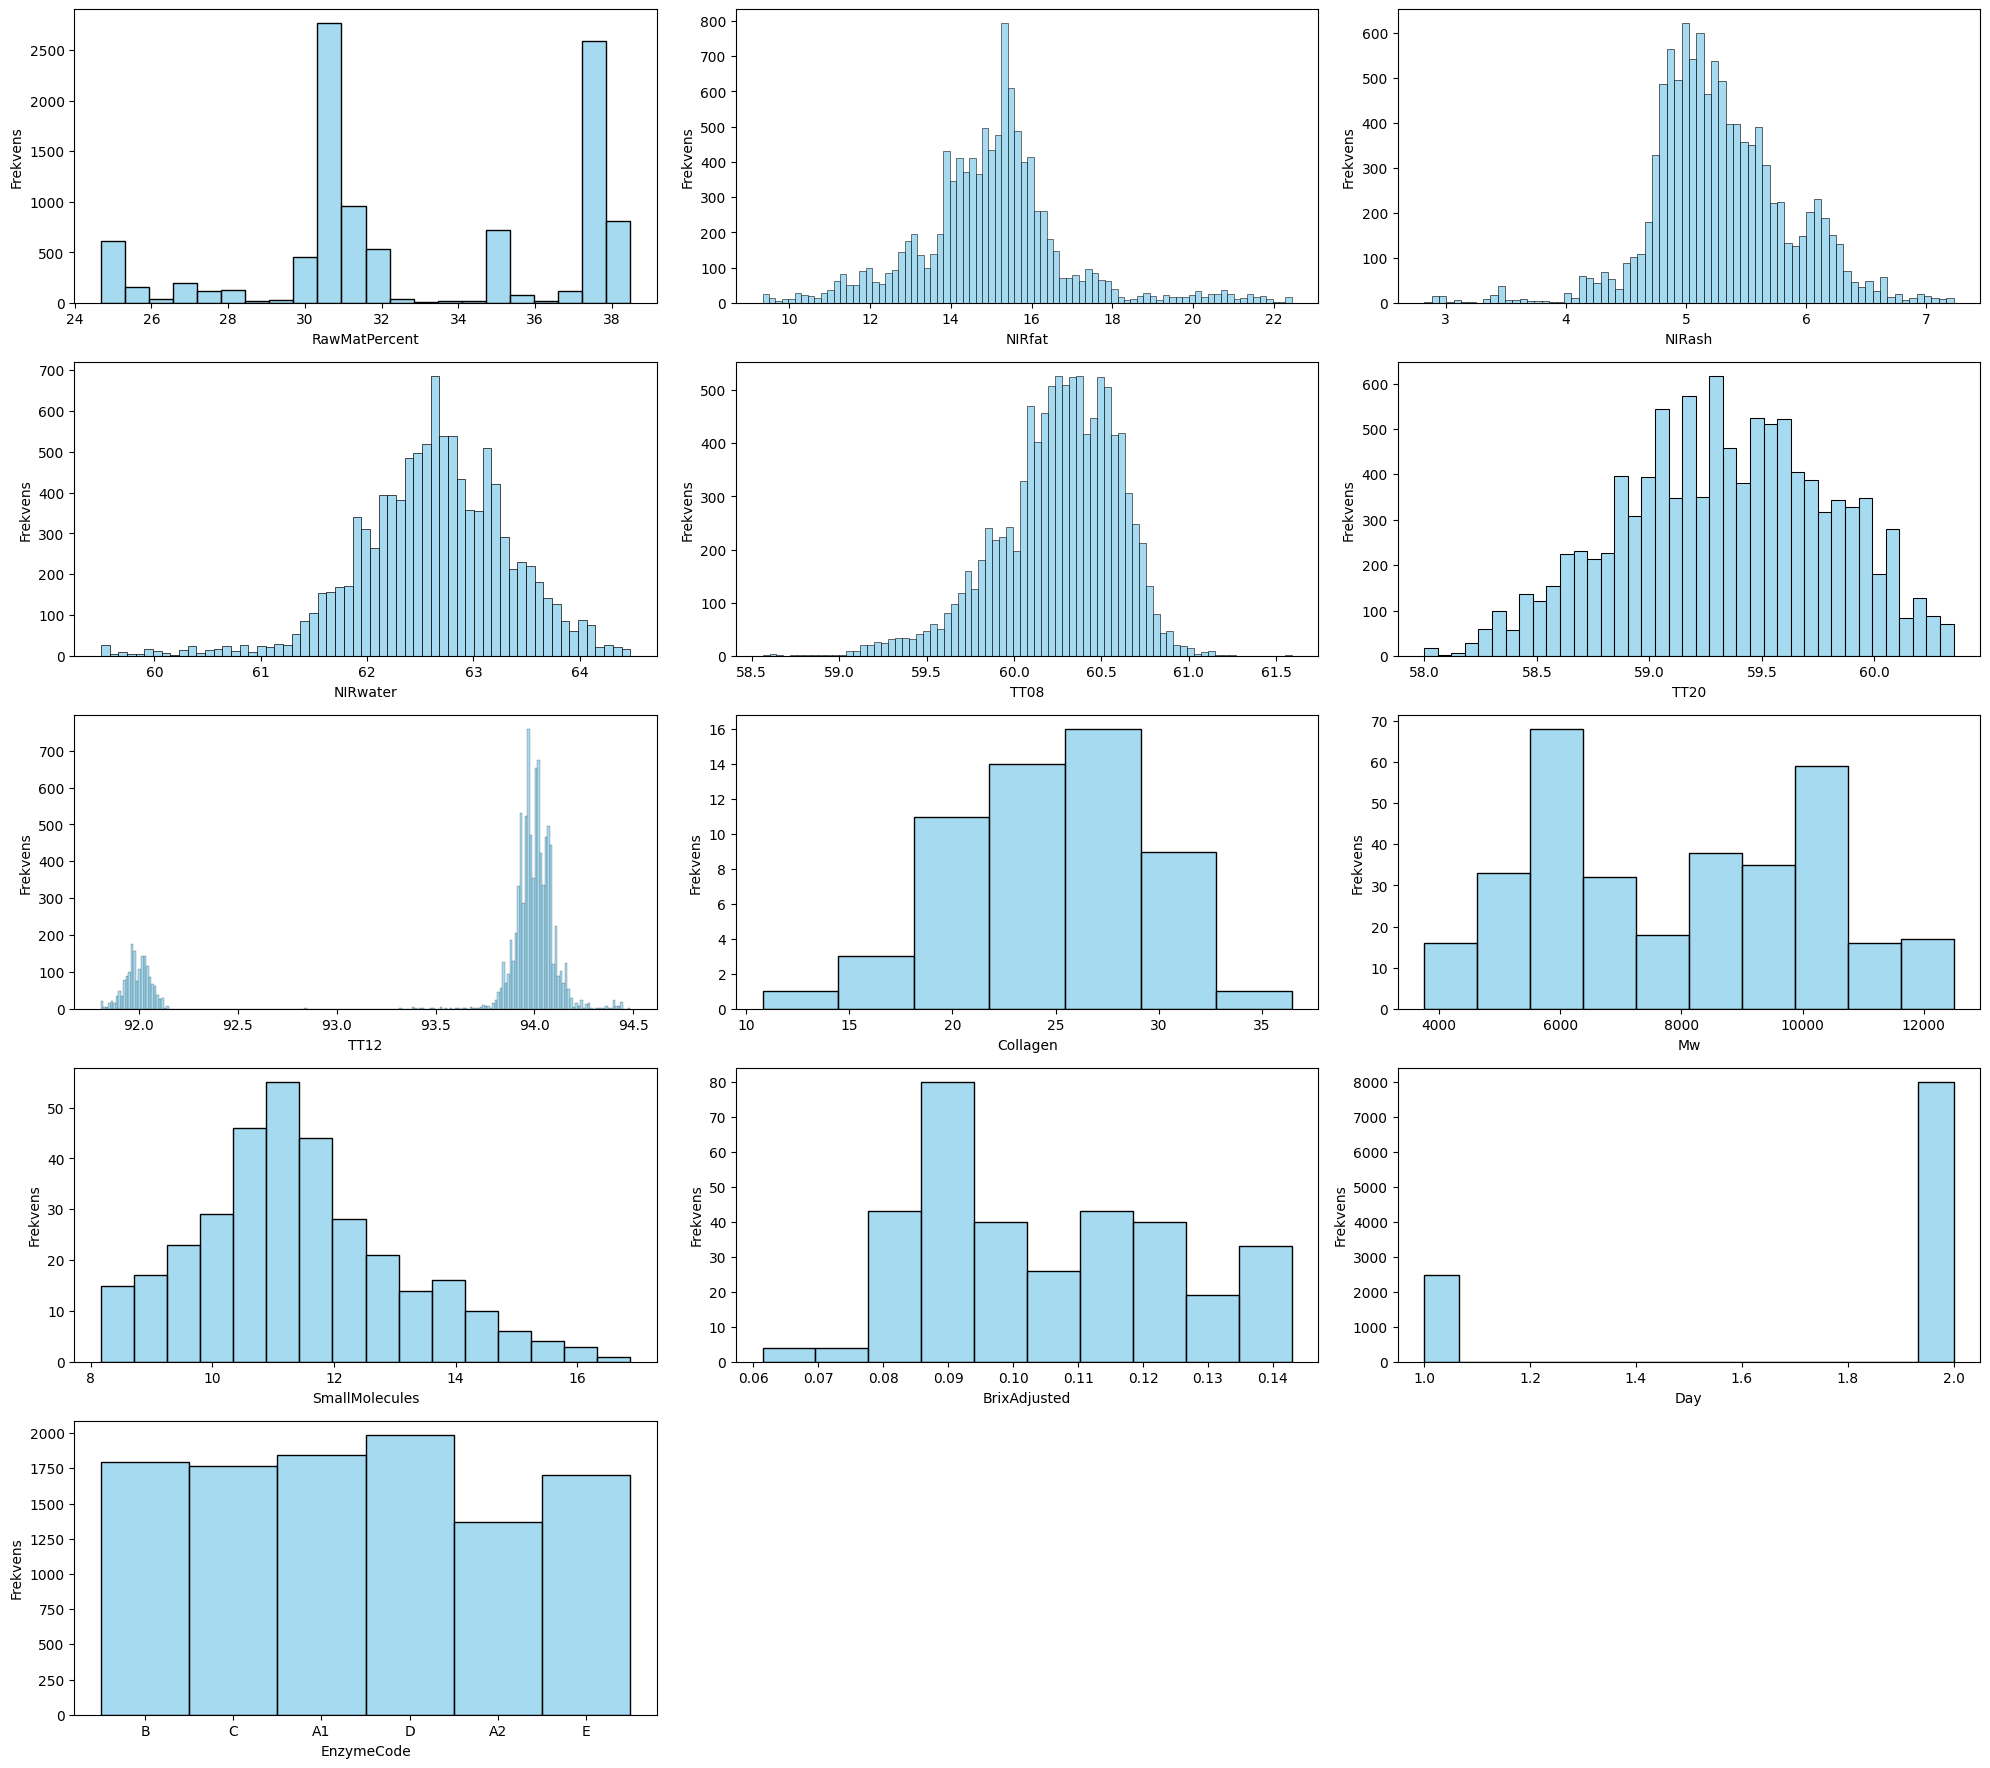

In [41]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(behandlet_data_designprod_enzym.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data_designprod_enzym):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=behandlet_data_designprod_enzym, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i design produksjon datasett

In [42]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 behandlet_data_designprod_enzym)
print(enzymtyper_data)

    Frekvens  Andel
D       1986  18.98
A1      1844  17.62
B       1793  17.13
C       1765  16.86
E       1706  16.30
A2      1372  13.11


Fordeling i markert del av datasettet

In [43]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_designprod_enzym.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_designprod_enzym.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

Fordeling i datasett med Collagen som markert respons

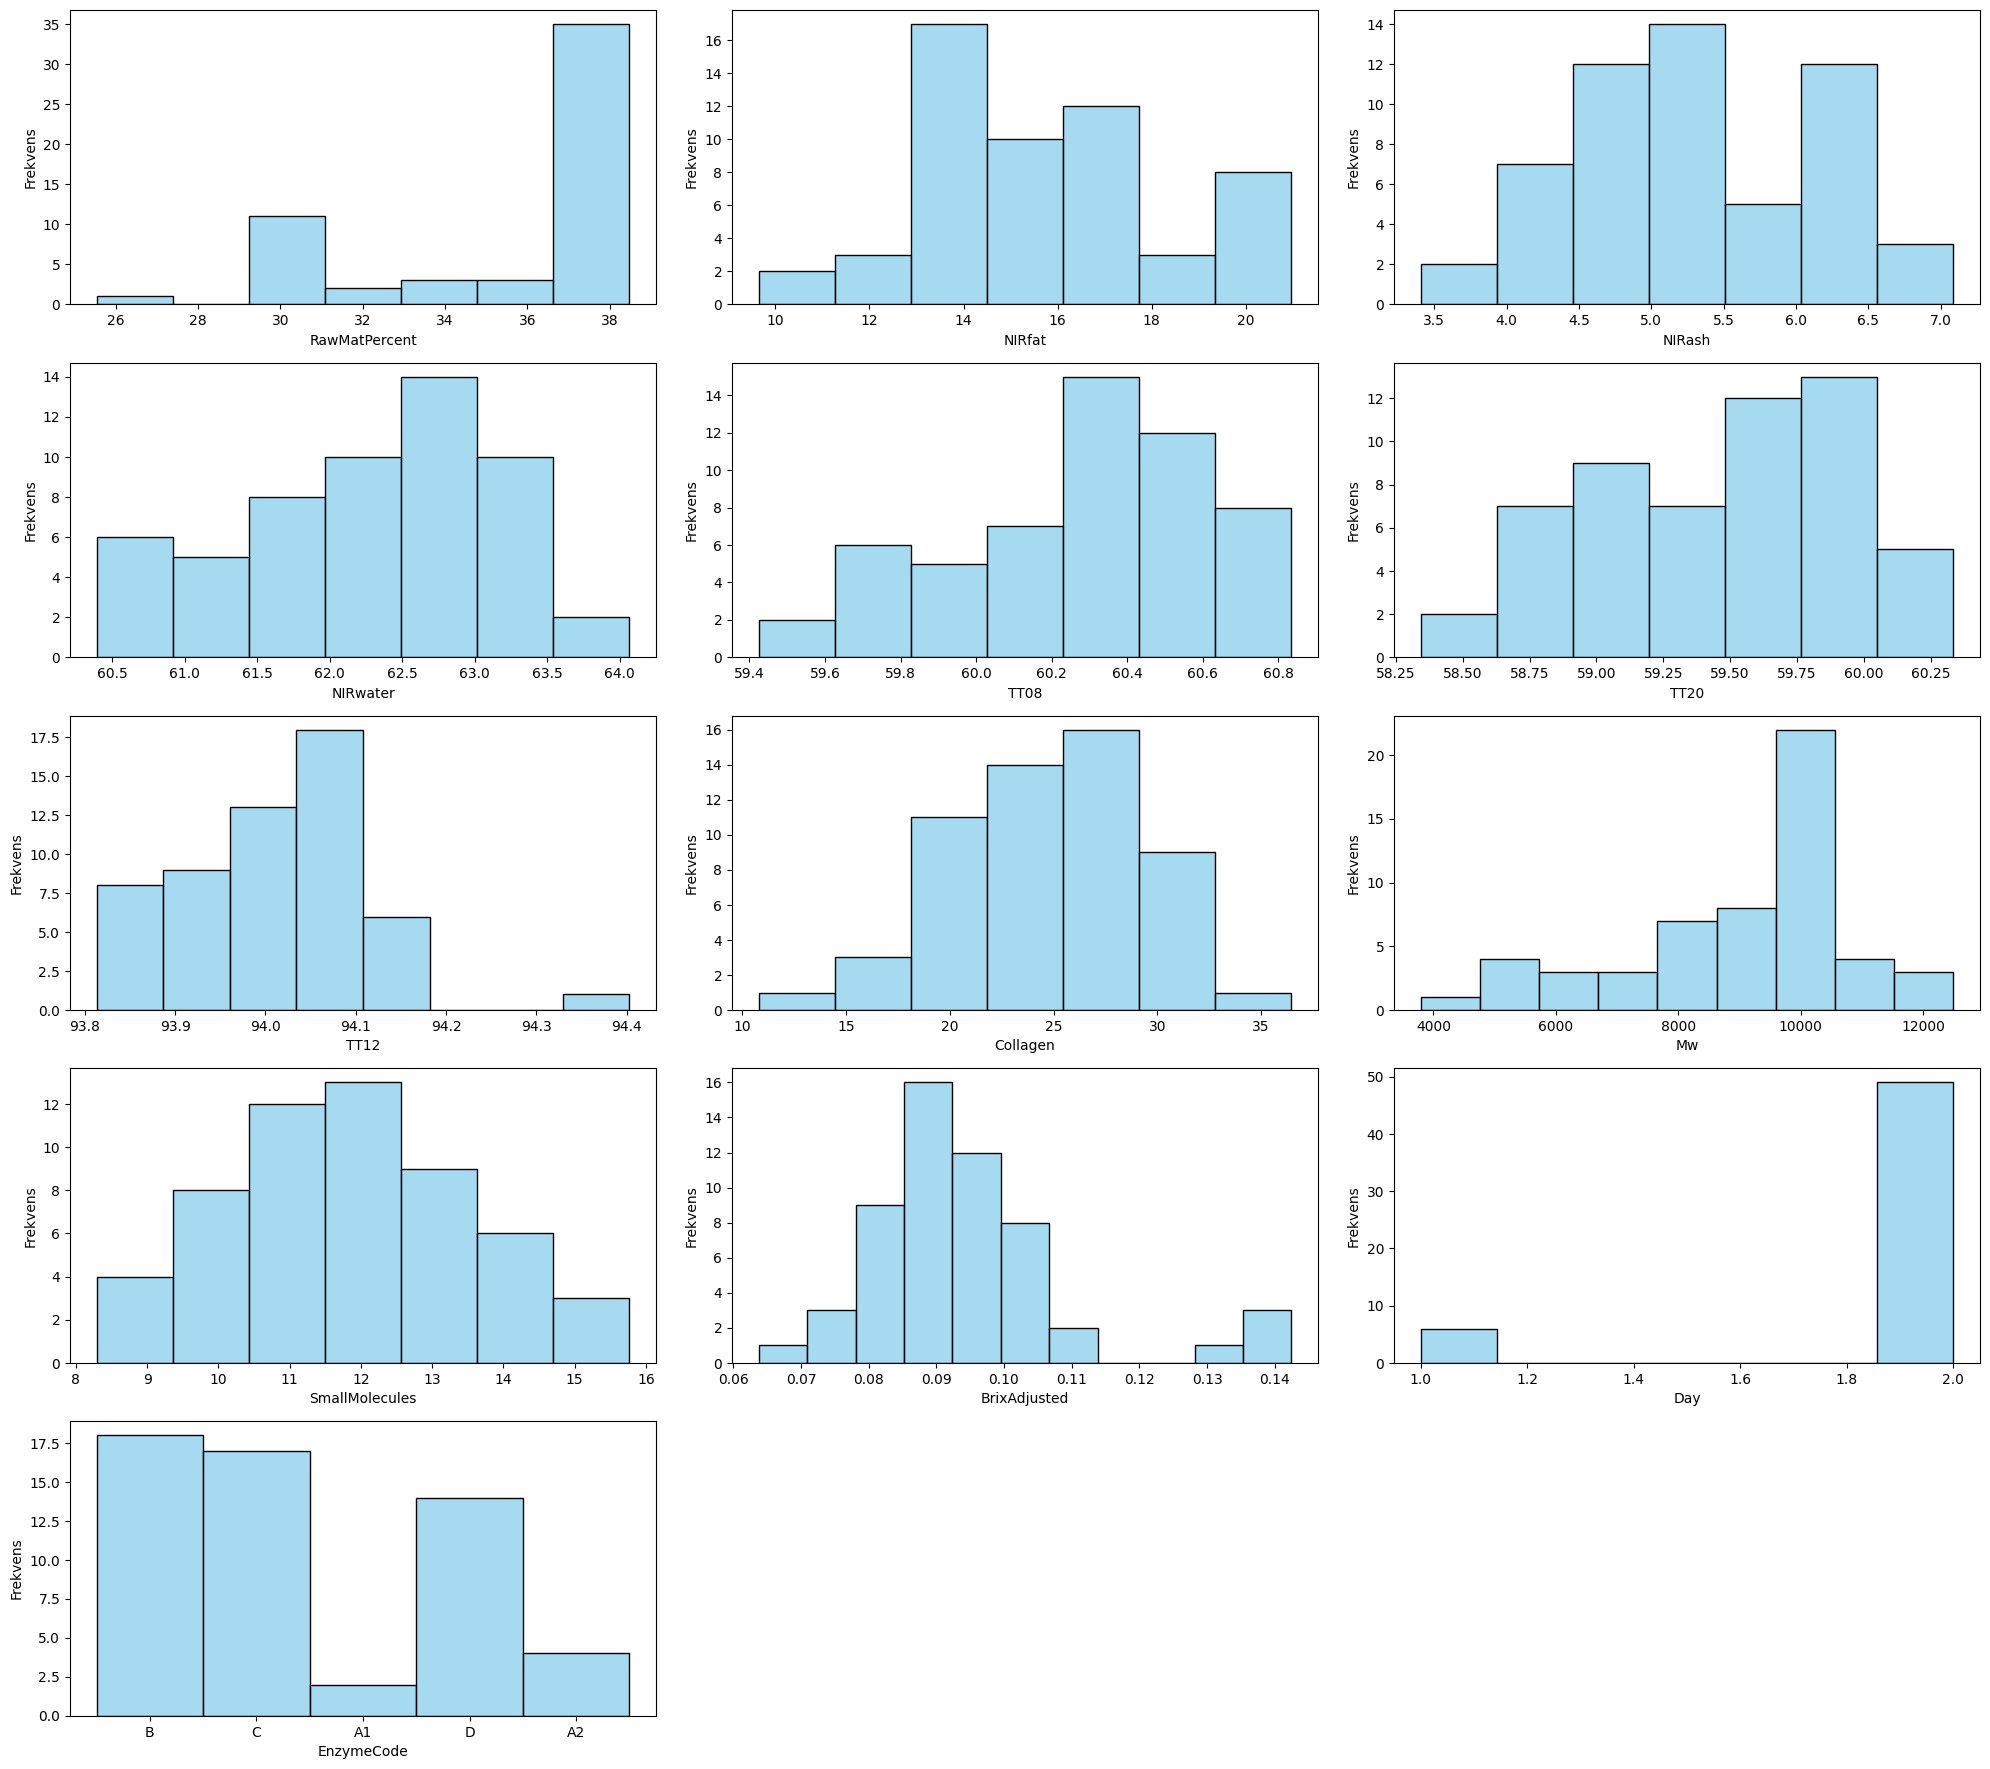

In [44]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(collagen_markert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_markert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=collagen_markert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med Collagen som respons

In [45]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 collagen_markert)
print(enzymtyper_data)

    Frekvens  Andel
B         18  32.73
C         17  30.91
D         14  25.45
A2         4   7.27
A1         2   3.64


Fordeling i datasett med resterende kvalitetsmålinger som markert respons

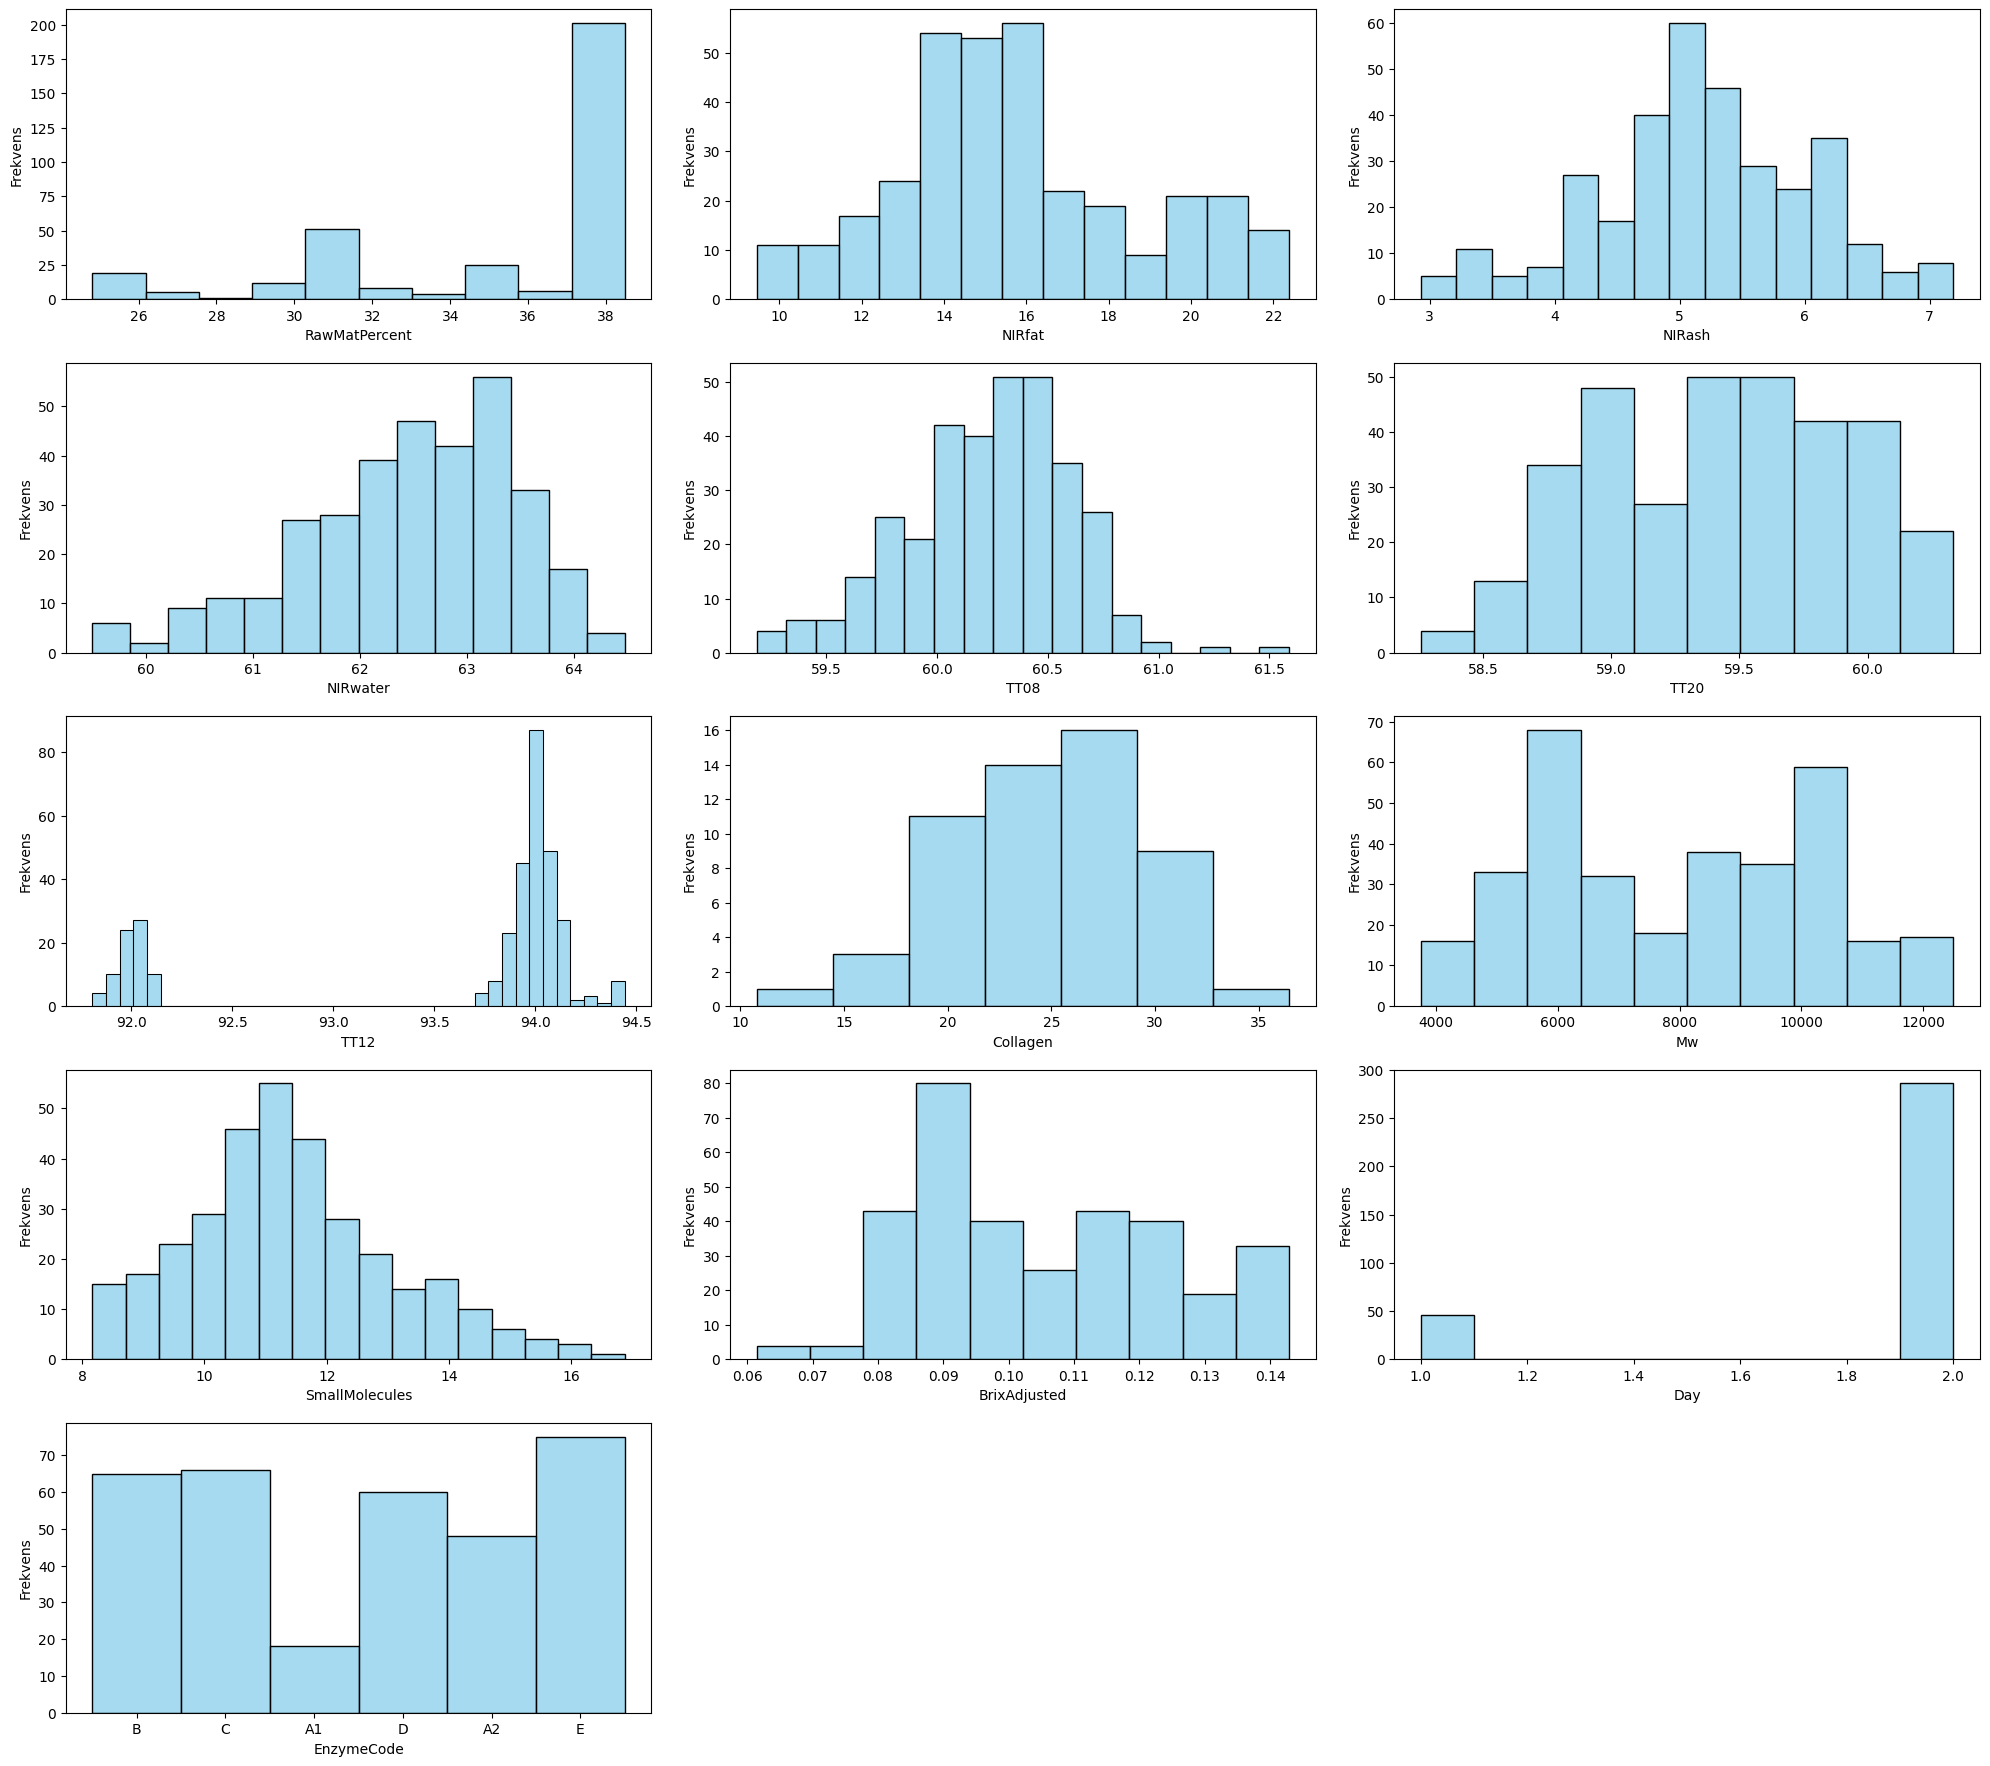

In [46]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(kvalitetsmålinger_markert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_markert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=kvalitetsmålinger_markert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som respons

In [47]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 kvalitetsmålinger_markert)
print(enzymtyper_data)

    Frekvens  Andel
E         75  22.59
C         66  19.88
B         65  19.58
D         60  18.07
A2        48  14.46
A1        18   5.42


Fordeling i umarkert del av datasettet

In [48]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = behandlet_data_designprod_enzym[behandlet_data_designprod_enzym['Collagen'].isna()]


# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = behandlet_data_designprod_enzym[behandlet_data_designprod_enzym['Mw'].isna()]

Fordeling i datasett med Collagen som umarkert respons

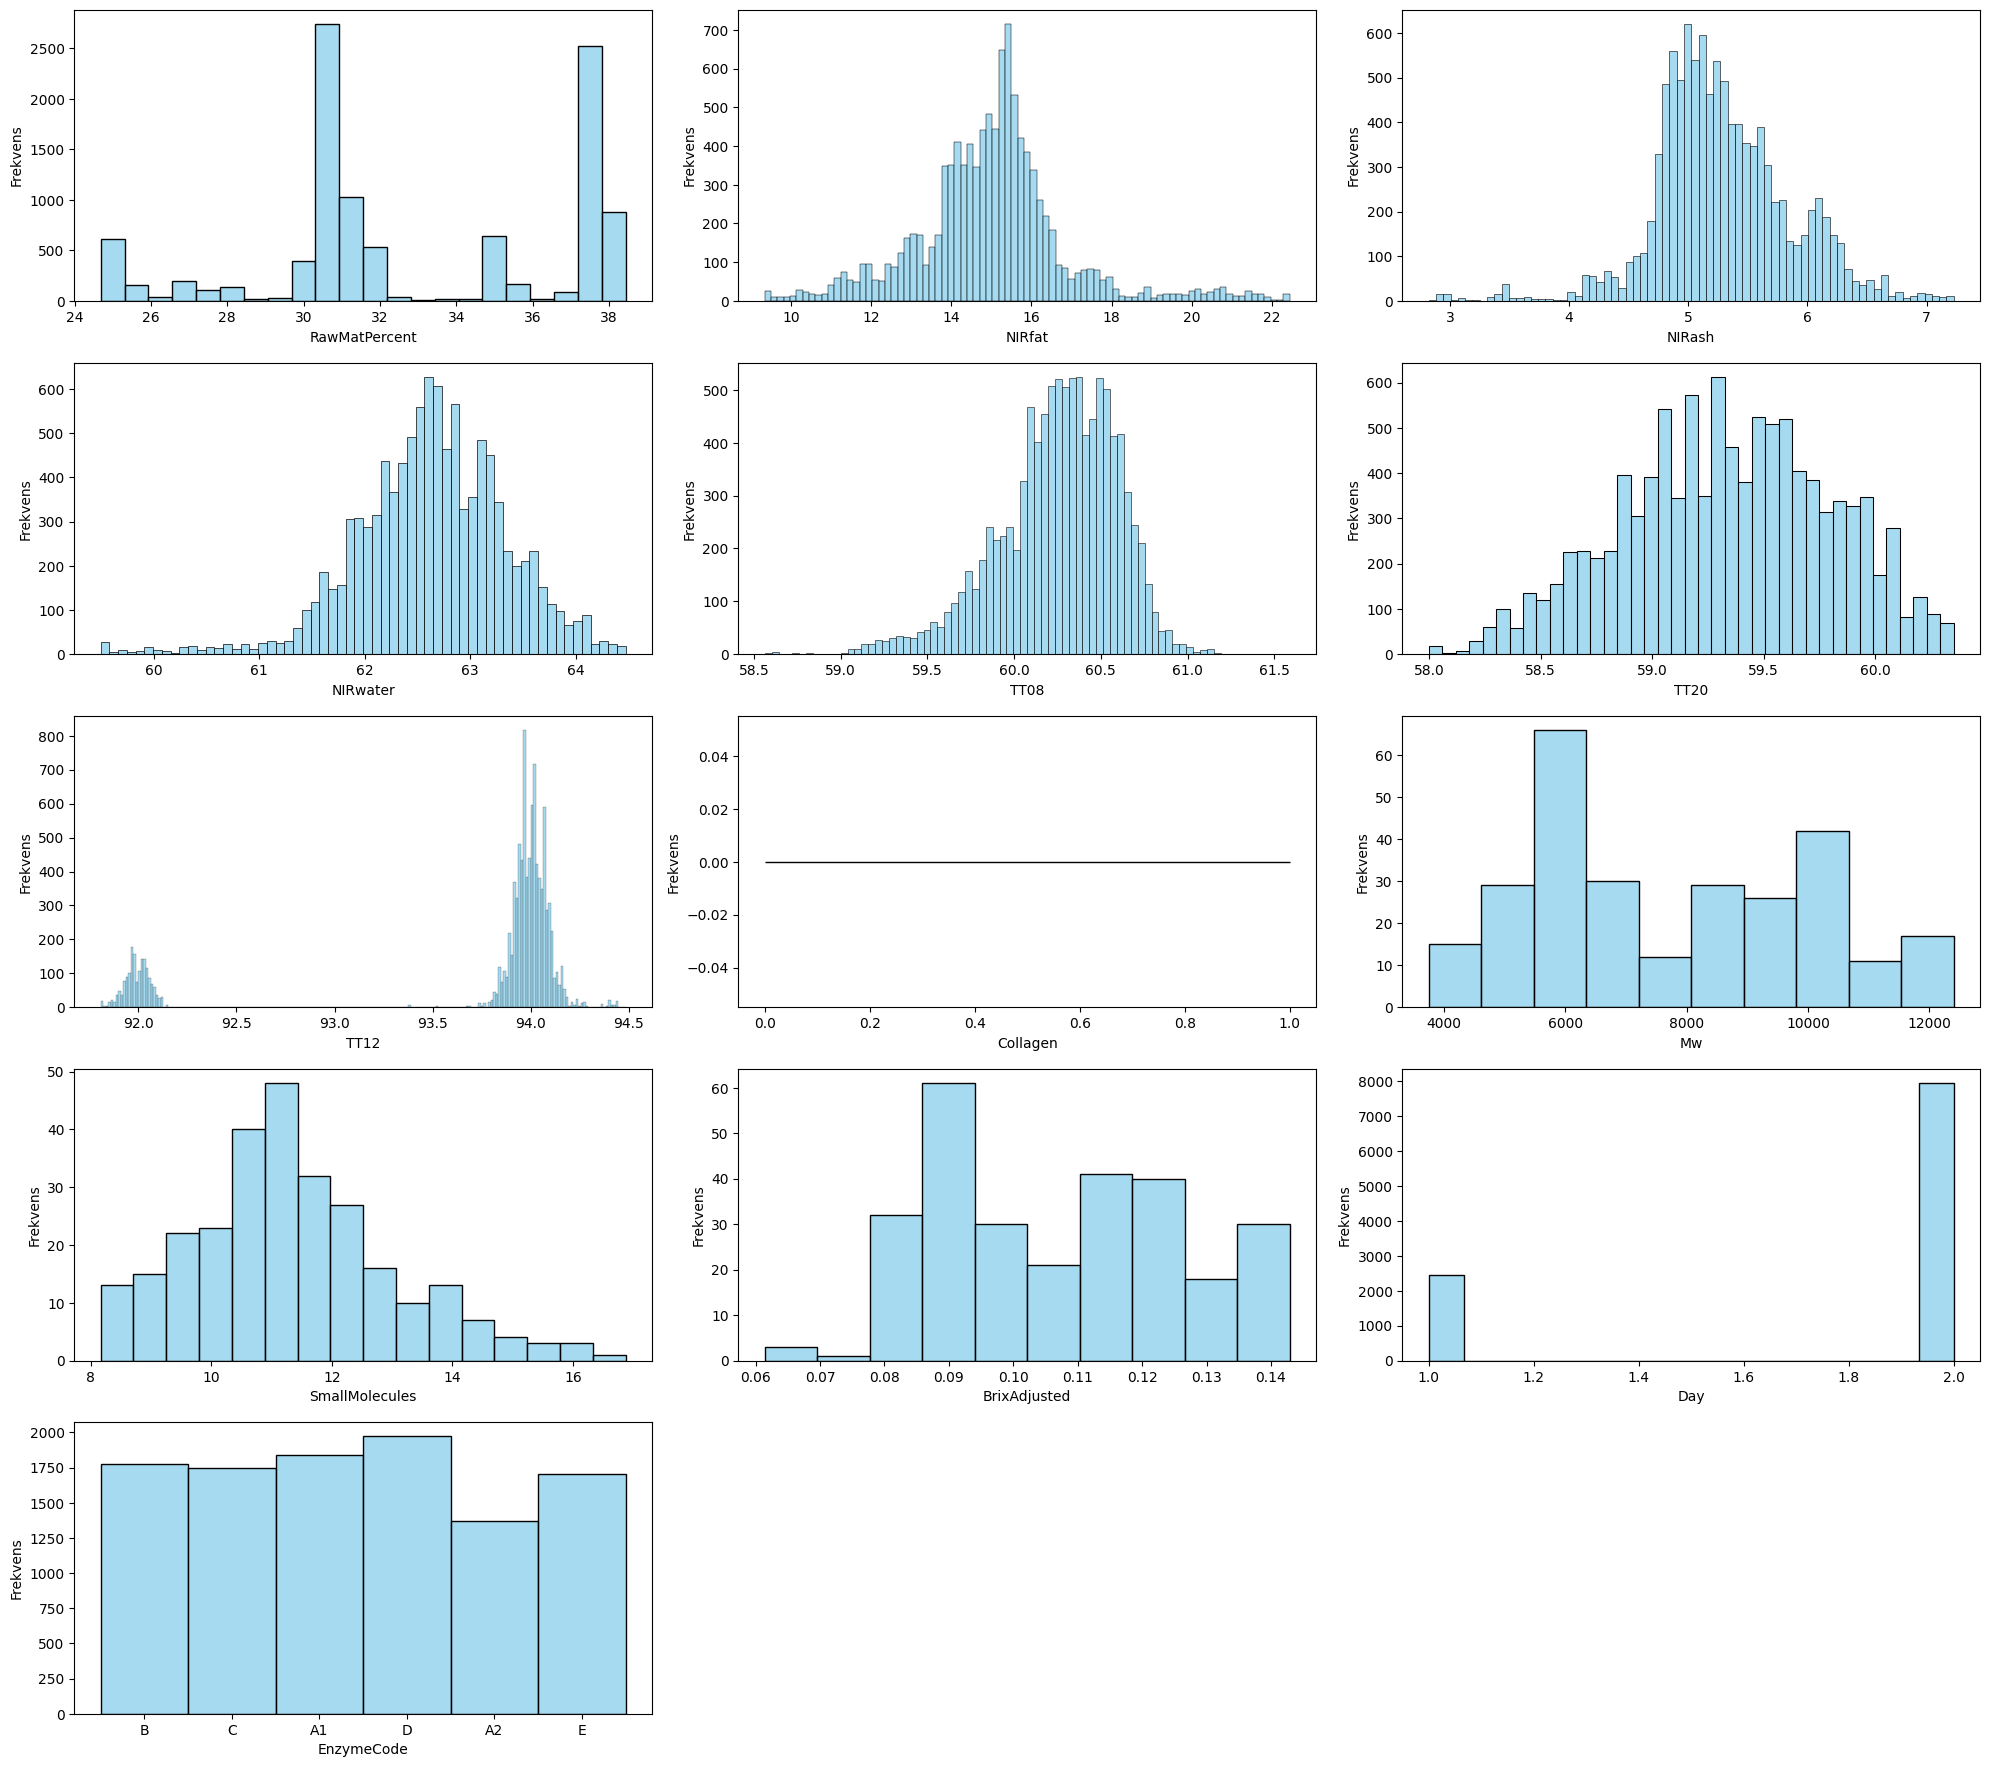

In [49]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(collagen_umarkert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_umarkert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=collagen_umarkert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med Collagen som respons

In [50]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 collagen_umarkert)
print(enzymtyper_data)

    Frekvens  Andel
D       1972  18.94
A1      1842  17.69
B       1775  17.05
C       1748  16.79
E       1706  16.39
A2      1368  13.14


Fordeling i datasett med resterende kvalitetsmålinger som umarkert respons

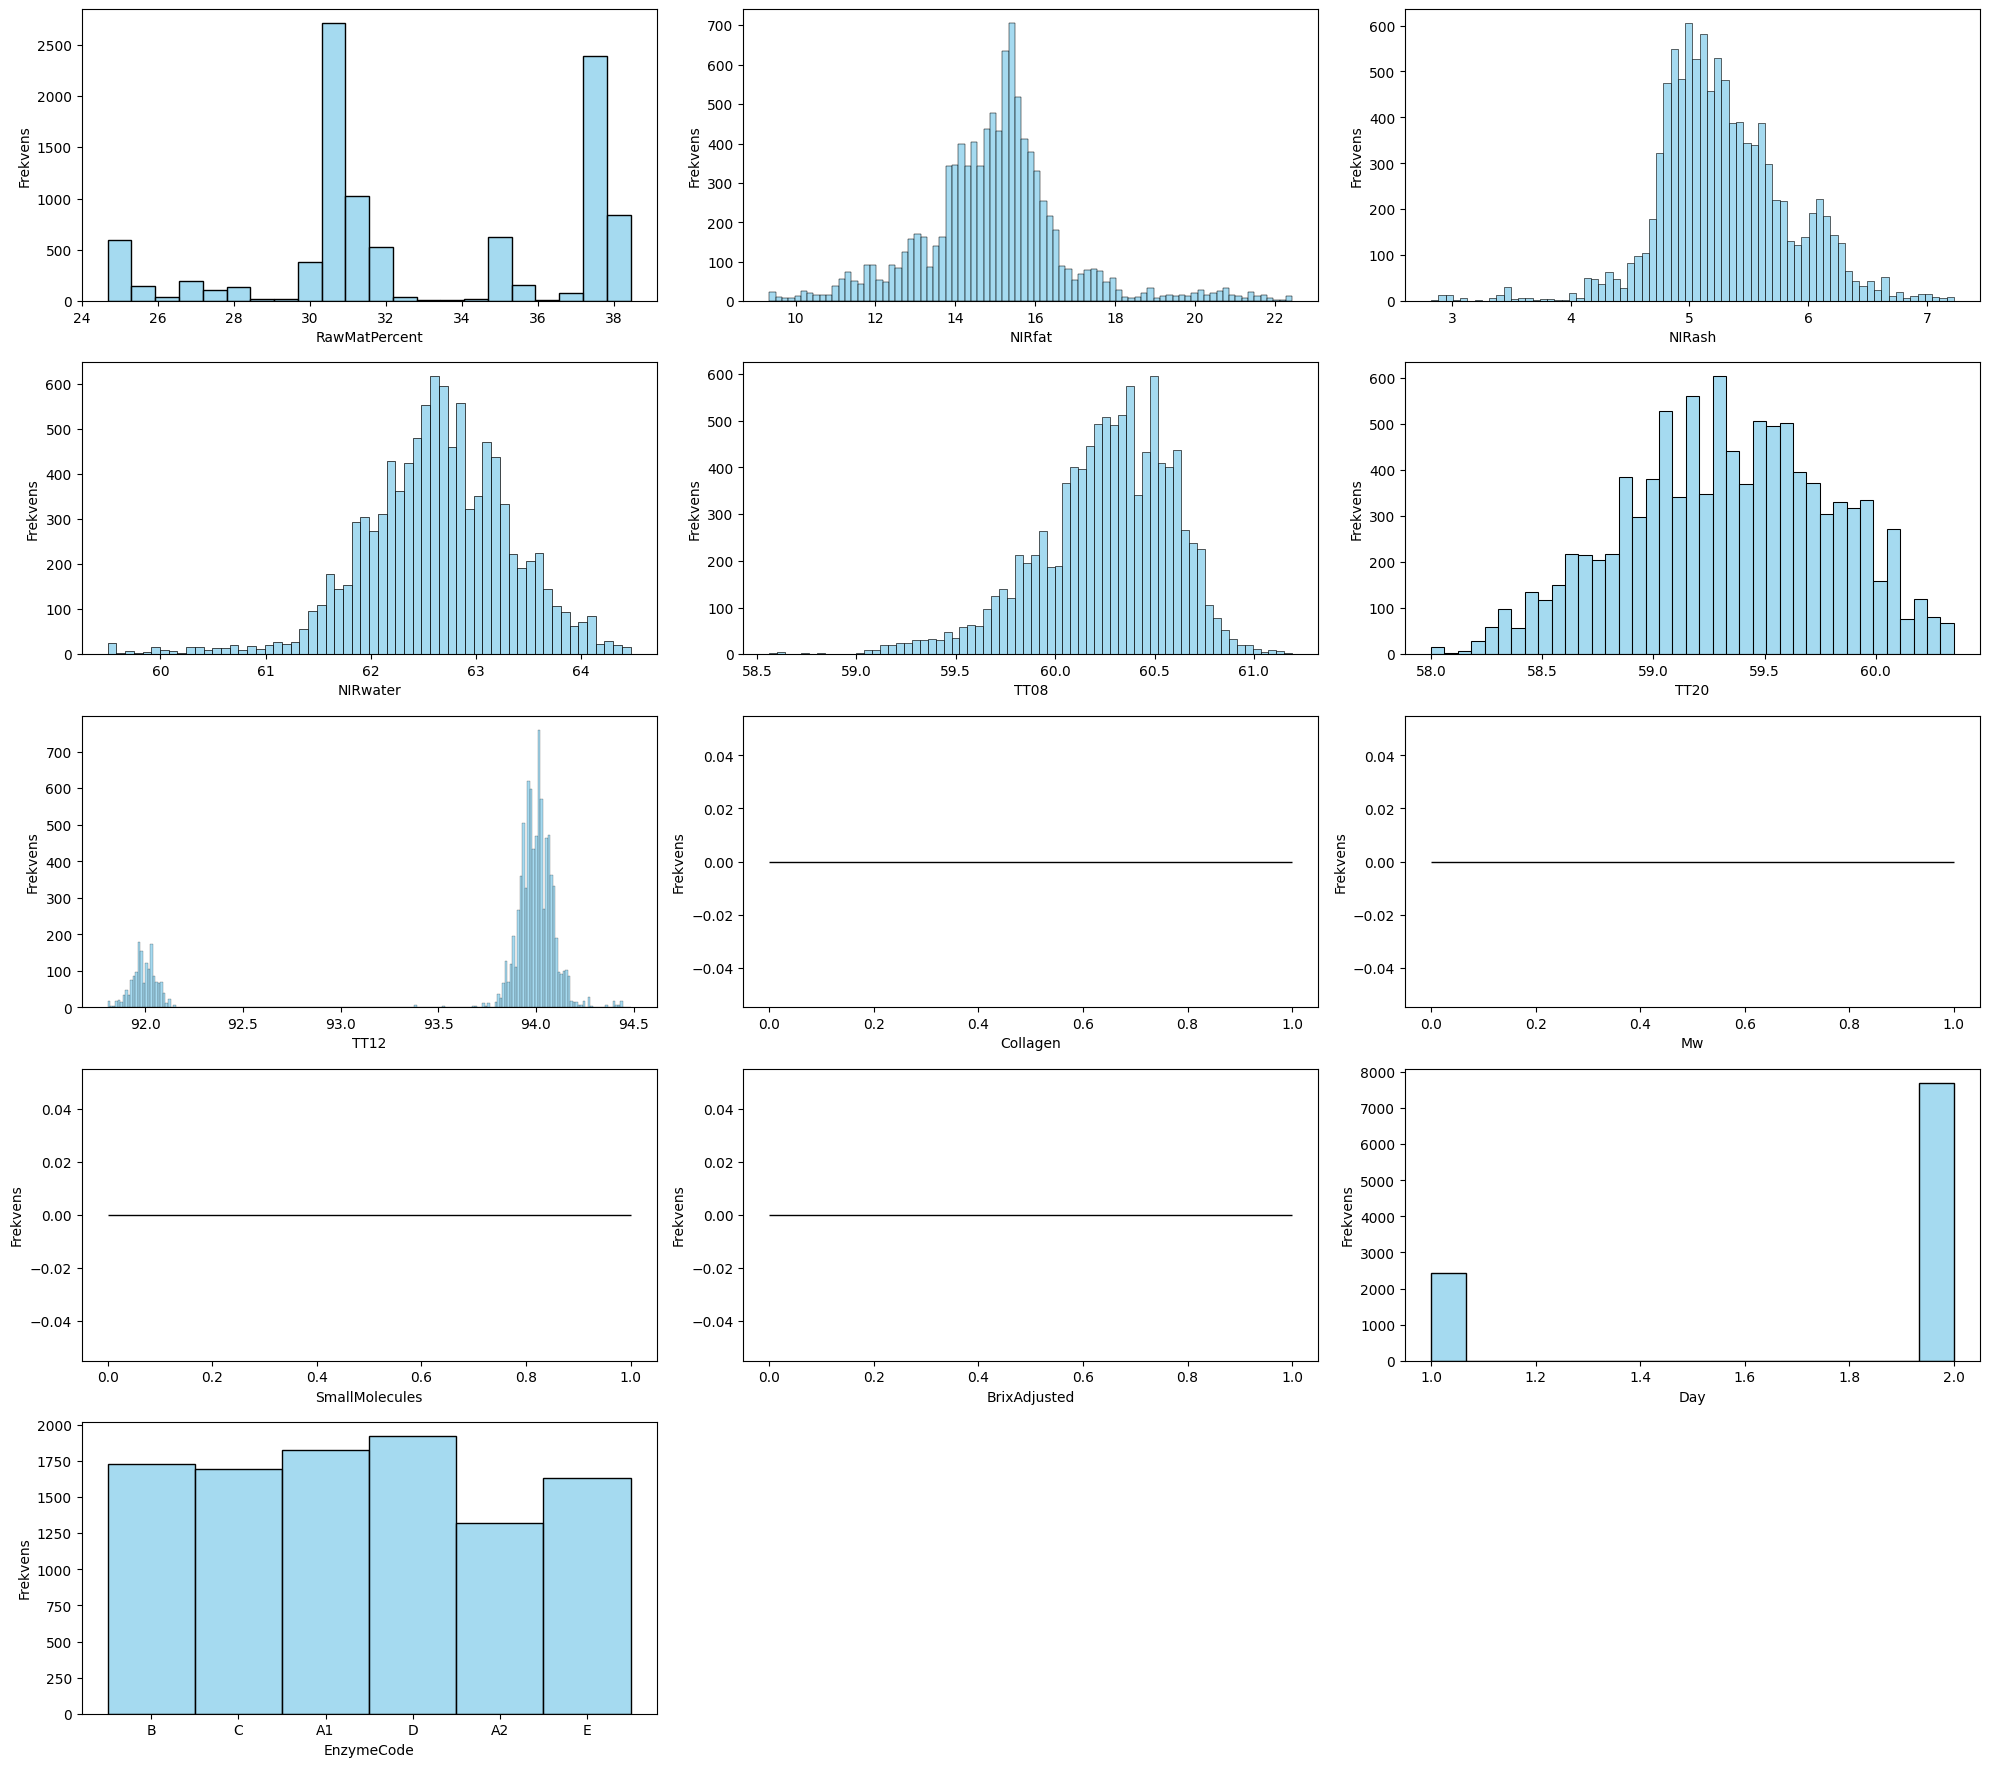

In [51]:
fig = plt.figure(figsize=(20, 35))
antall_kolonnner = len(kvalitetsmålinger_umarkert.columns)
rute_nett = fig.add_gridspec(10, 3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_umarkert):
    if nummer % 3 == 0:
        n += 1
        i = 0
    ax = fig.add_subplot(rute_nett[n, i])

    sns.histplot(x=indeks, data=kvalitetsmålinger_umarkert, color='skyblue', ax=ax)
    ax.set_ylabel('Frekvens', fontsize=10)

    i += 1

fig.tight_layout()

plt.show()

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som respons

In [52]:
# Fordelingen i "EnzymeCode"

enzymtyper_data = enzymfordeling(rå_data,
                                 kvalitetsmålinger_umarkert)
print(enzymtyper_data)

    Frekvens  Andel
D       1926  19.01
A1      1826  18.02
B       1728  17.05
C       1699  16.77
E       1631  16.09
A2      1324  13.06


# Oppdeling av datasett

Oppdeling av data for hver kvalitetsmåling

In [53]:
# Lager en kopi av datasett med en kvalitesmåling som respons hver
collagen_data = behandlet_data.drop(columns=['Mw',
                                             'SmallMolecules',
                                             'BrixAdjusted'])

mw_data = behandlet_data.drop(columns=['Collagen',
                                       'SmallMolecules',
                                       'BrixAdjusted'])

smallmoleclues_data = behandlet_data.drop(columns=['Collagen',
                                                   'Mw',
                                                   'BrixAdjusted'])

brixadjusted_data = behandlet_data.drop(columns=['Collagen',
                                                 'Mw',
                                                 'SmallMolecules'])

Oppdeling av data for hver kvalitetsmåling (normal produksjon)

In [54]:
# Eksluderer kolonne "Day" fra datasettet
behandlet_data_normalprod.drop(columns= ["Day"], inplace = True)

# Lager en kopi av datasett med en kvalitesmåling under normalproduksjon
# som respons hver
collagen_data_normal = behandlet_data_normalprod.drop(columns=['Mw',
                                                               'SmallMolecules',
                                                               'BrixAdjusted'])

mw_data_normal = behandlet_data_normalprod.drop(columns=['Collagen',
                                                         'SmallMolecules',
                                                         'BrixAdjusted'])

smallmoleclues_data_normal = behandlet_data_normalprod.drop(columns=['Collagen',
                                                                     'Mw',
                                                                     'BrixAdjusted'])

brixadjusted_data_normal = behandlet_data_normalprod.drop(columns=['Collagen',
                                                                   'Mw',
                                                                   'SmallMolecules'])

Oppdeling av data for hver kvalitetsmåling (design produksjon)

In [55]:
# Eksluderer kolonne "Day" fra datasettet
behandlet_data_designprod.drop(columns= ["Day"], inplace = True)

# Lager en kopi av datasett med en kvalitesmåling under normalproduksjon
# som respons hver
collagen_data_design = behandlet_data_designprod.drop(columns=['Mw',
                                                               'SmallMolecules',
                                                               'BrixAdjusted'])

mw_data_design = behandlet_data_designprod.drop(columns=['Collagen',
                                                         'SmallMolecules',
                                                         'BrixAdjusted'])

smallmoleclues_data_design = behandlet_data_designprod.drop(columns=['Collagen',
                                                                     'Mw',
                                                                     'BrixAdjusted'])

brixadjusted_data_design = behandlet_data_designprod.drop(columns=['Collagen',
                                                                   'Mw',
                                                                   'SmallMolecules'])

Lagring av alle datasett som csv filer

In [56]:
collagen_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data.csv')
mw_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data.csv')
smallmoleclues_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmoleclues_data.csv')
brixadjusted_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data.csv')

collagen_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data_normal.csv')
mw_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data_normal.csv')
smallmoleclues_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmoleclues_data_normal.csv')
brixadjusted_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data_normal.csv')

collagen_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data_design.csv')
mw_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data_design.csv')
smallmoleclues_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmoleclues_data_design.csv')
brixadjusted_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data_design.csv')